In [35]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

In [36]:
m0_scale    = 14
m0_min      = 2.4
m0_max      = 16
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# ---- mass_trainer_aToTauTau_m1p2To17p2_v2_5ch ---

# U to 2tau validation sample

In [ ]:
bin_width=0.4

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch11_val_pseudoscalar_mae2.0274_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


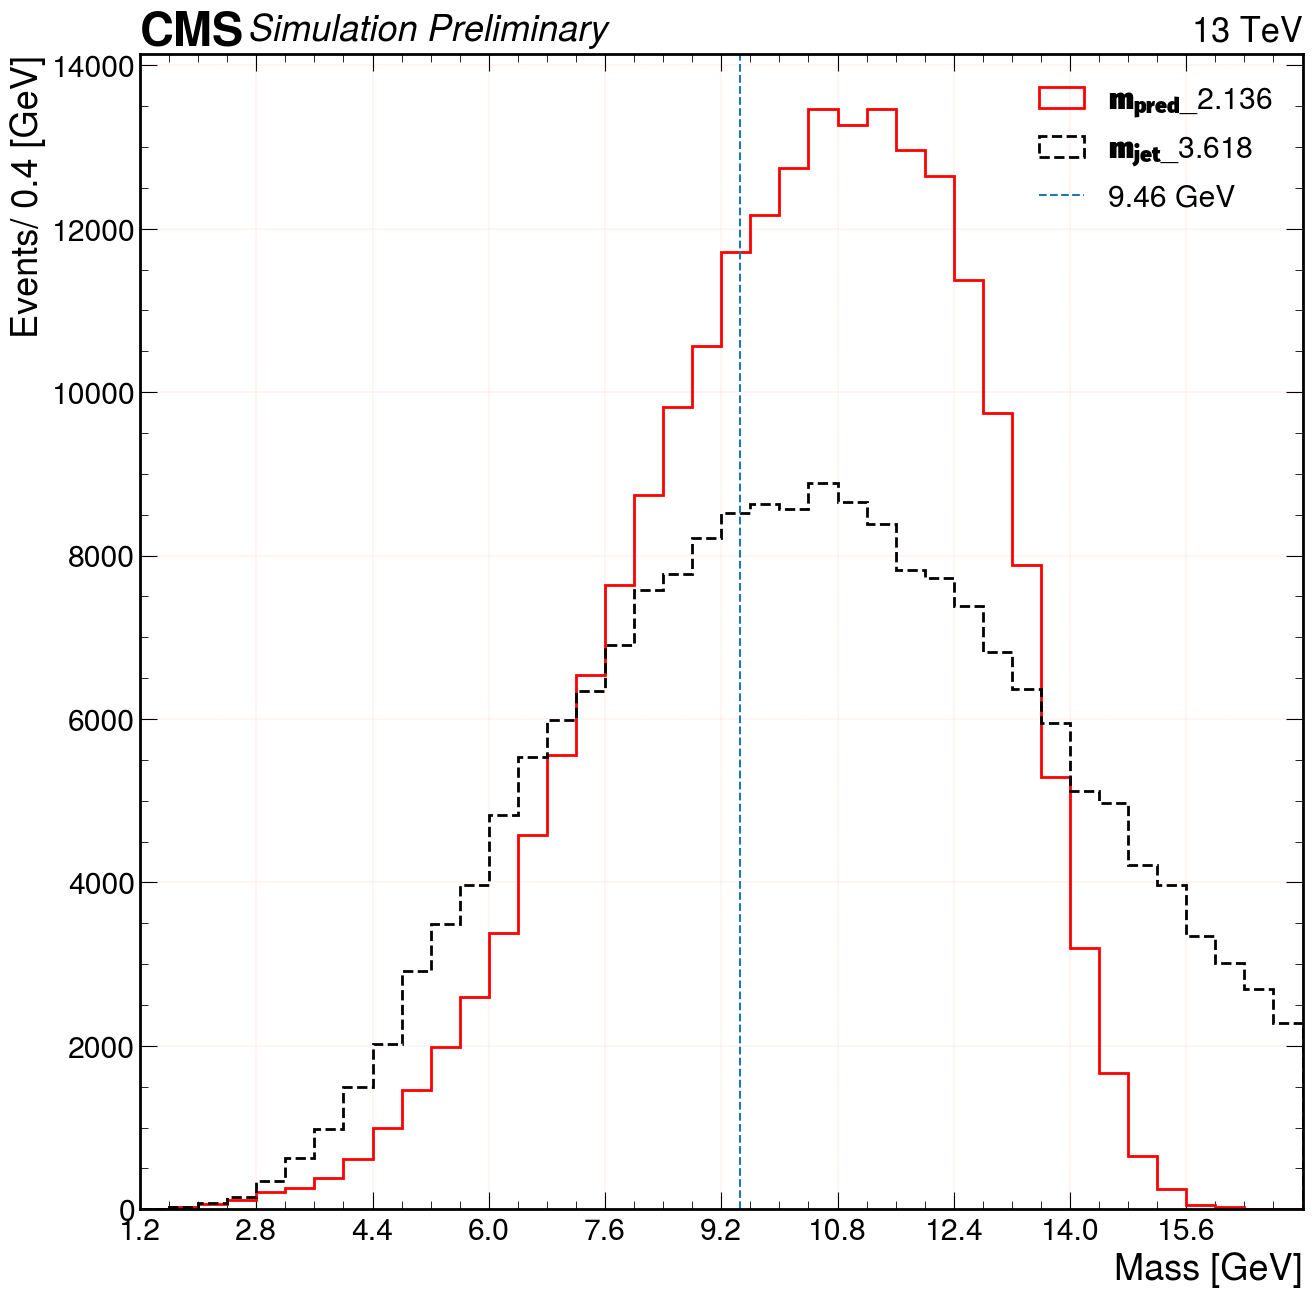

In [219]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch11_val_pseudoscalar_mae2.0274_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_u = data["m_true"]
m_pred_u = data["m_pred"]
jet_massu = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width = 0.4


# Plot error bars


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_u, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_massu, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)

plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


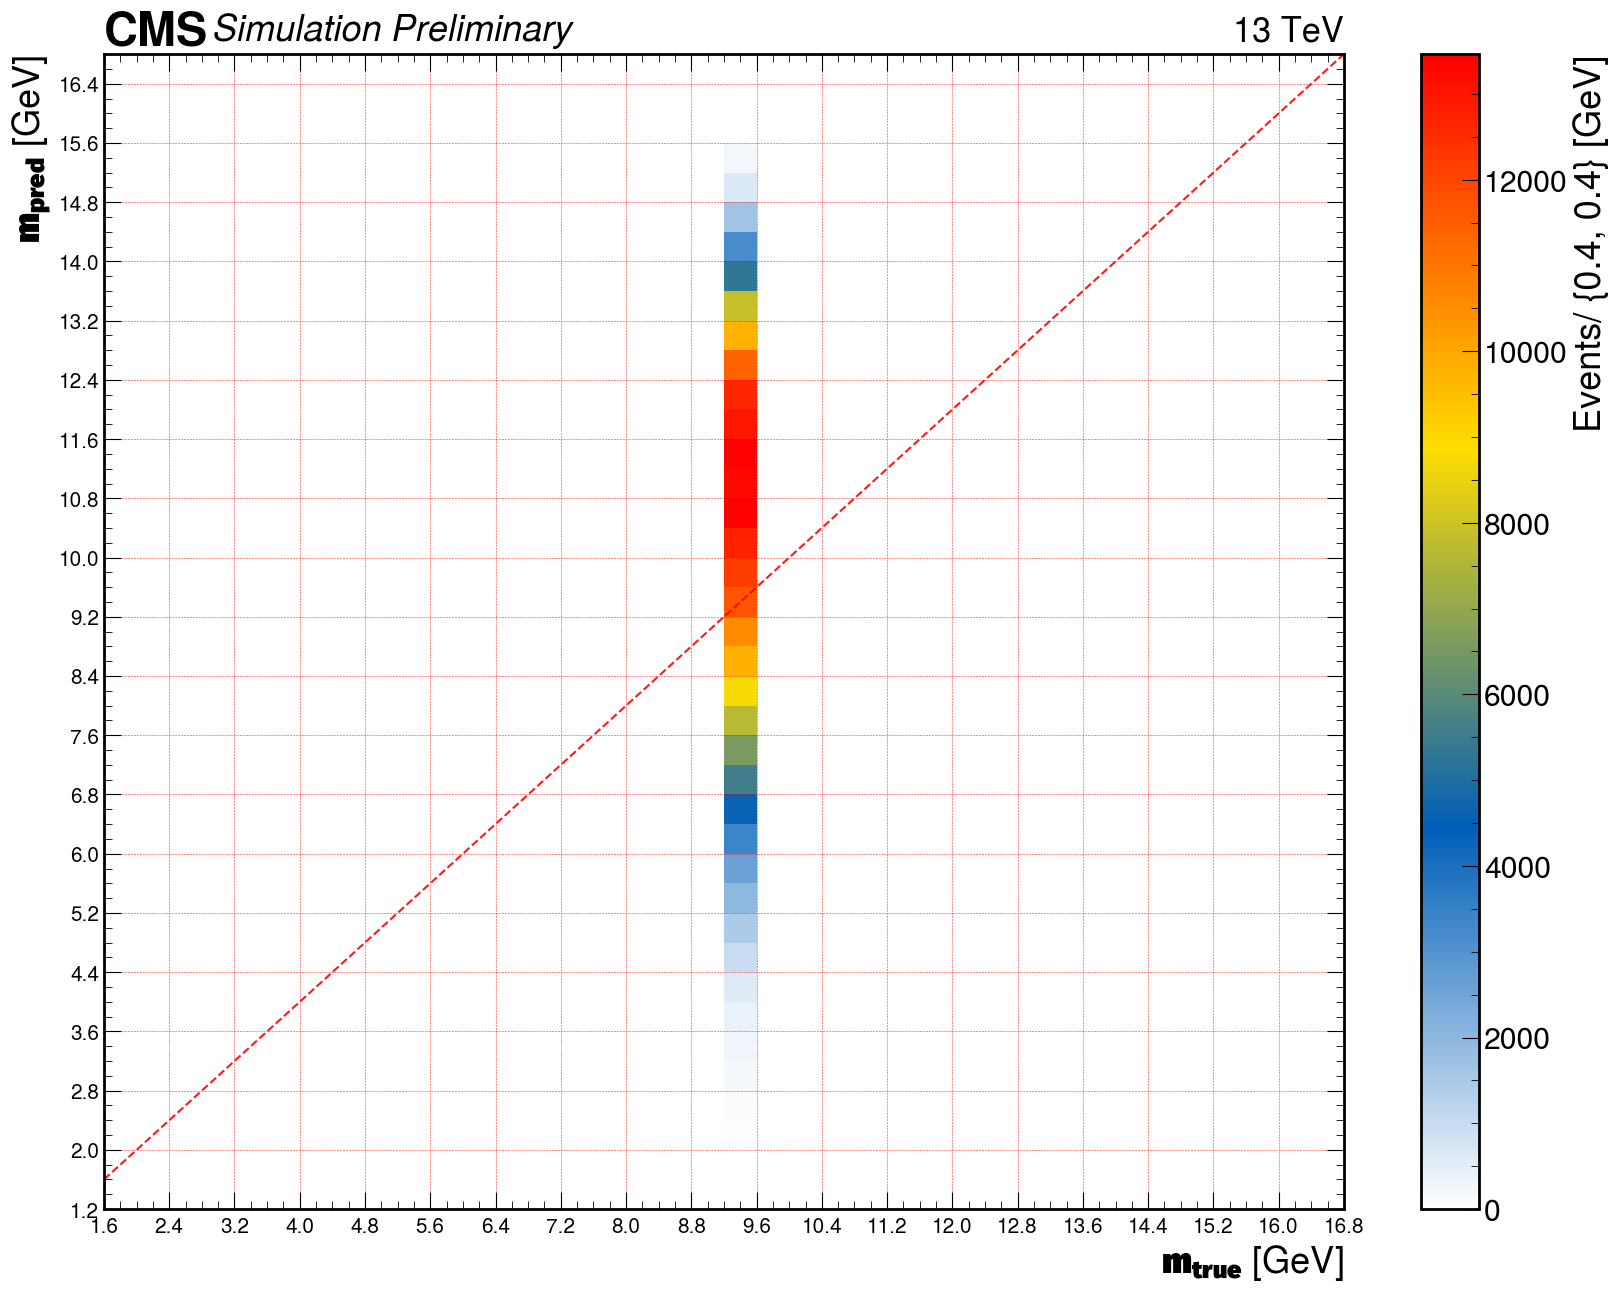

In [220]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_u), np.squeeze(m_pred_u), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 3.7 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.6434_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


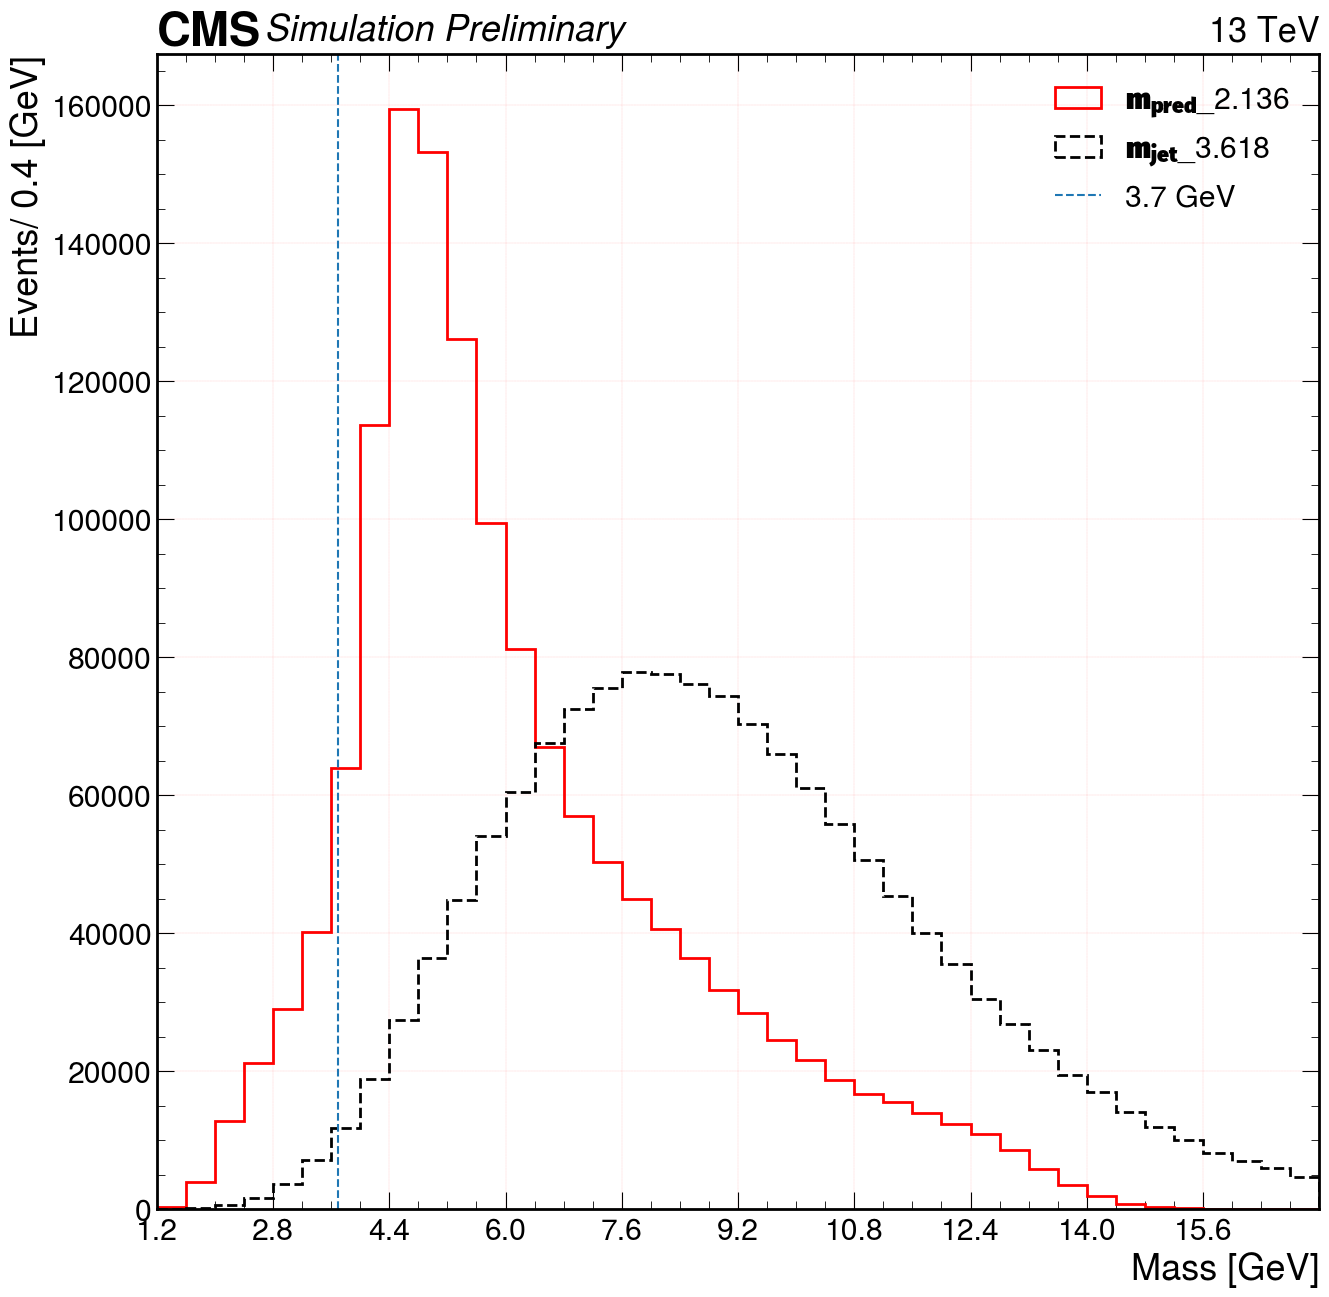

In [221]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.6434_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_3 = data["m_true"]
m_pred_3 = data["m_pred"]
jet_mass3 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_3 , range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 3.7,linestyle='--',label=f'3.7 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


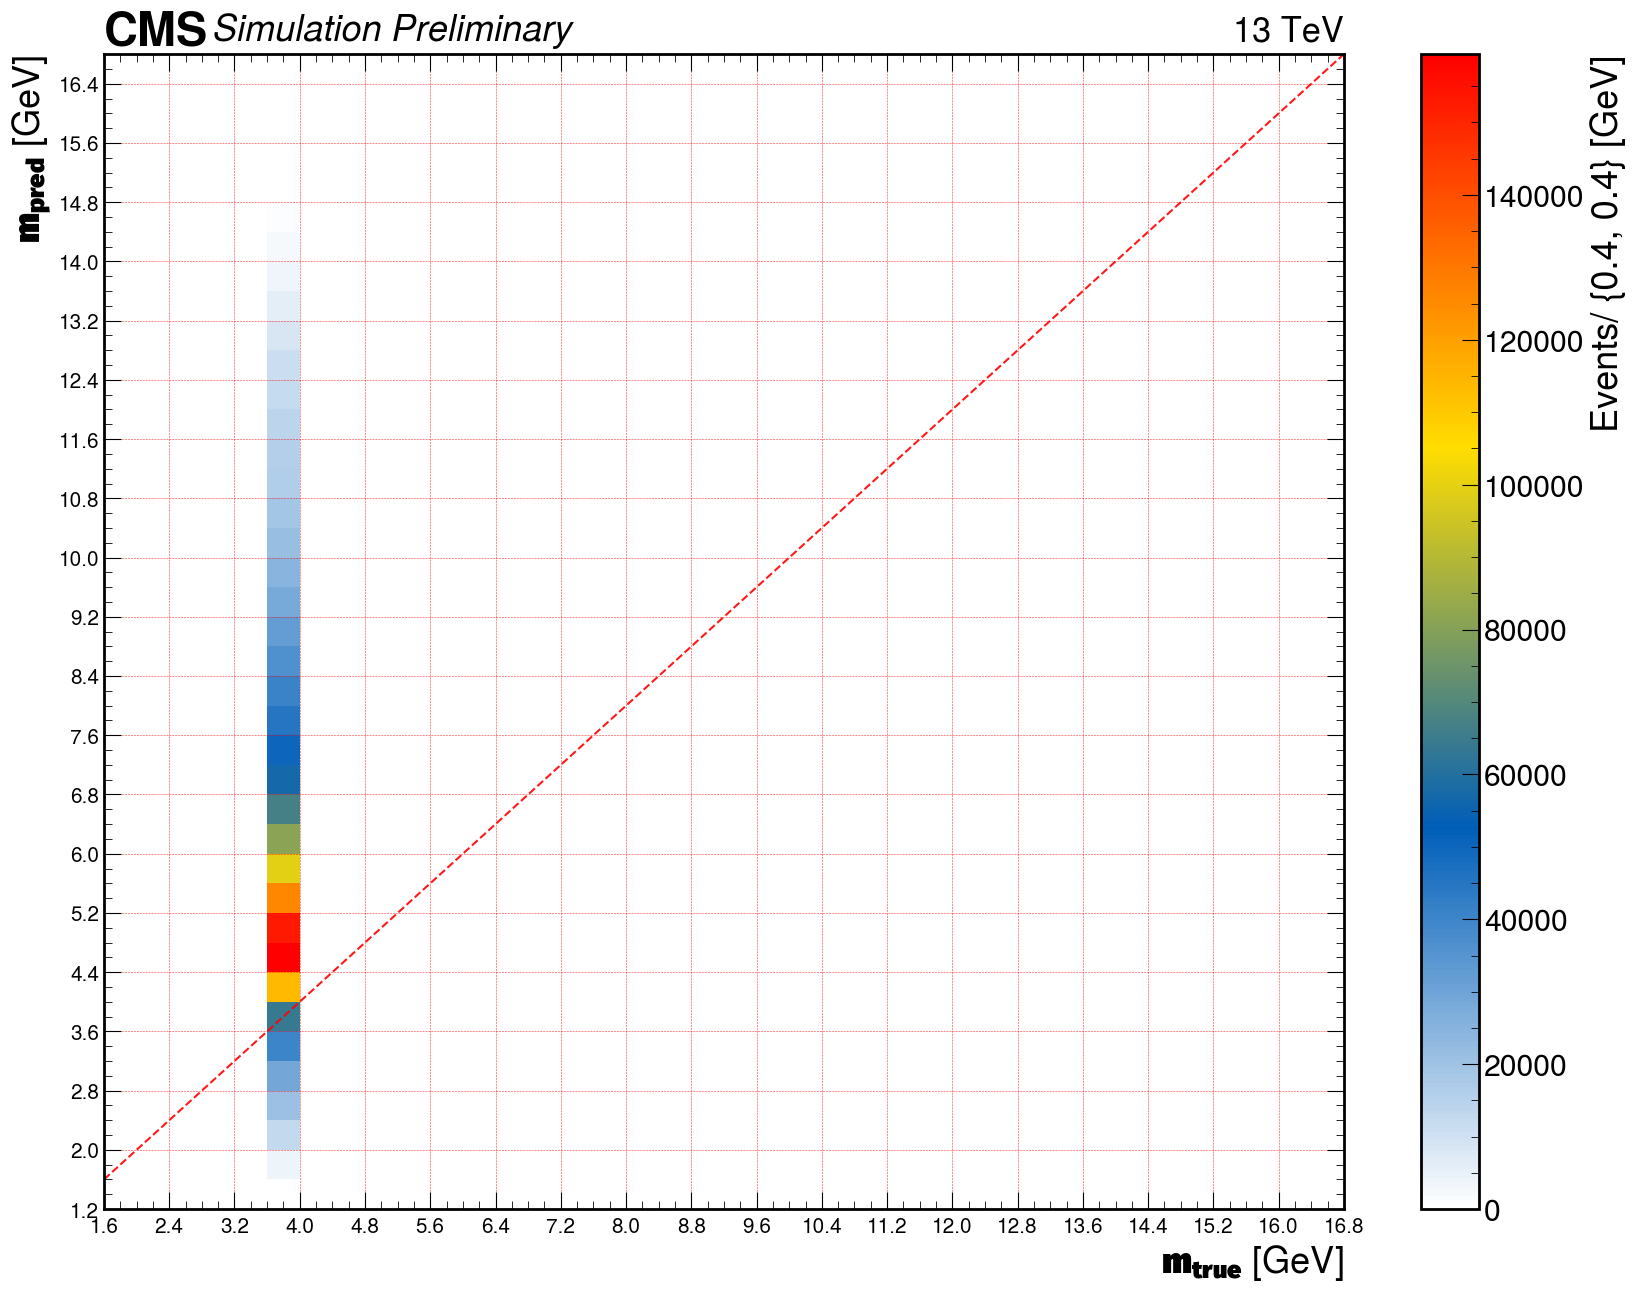

In [222]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_3), np.squeeze(m_pred_3), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 4 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.4762_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


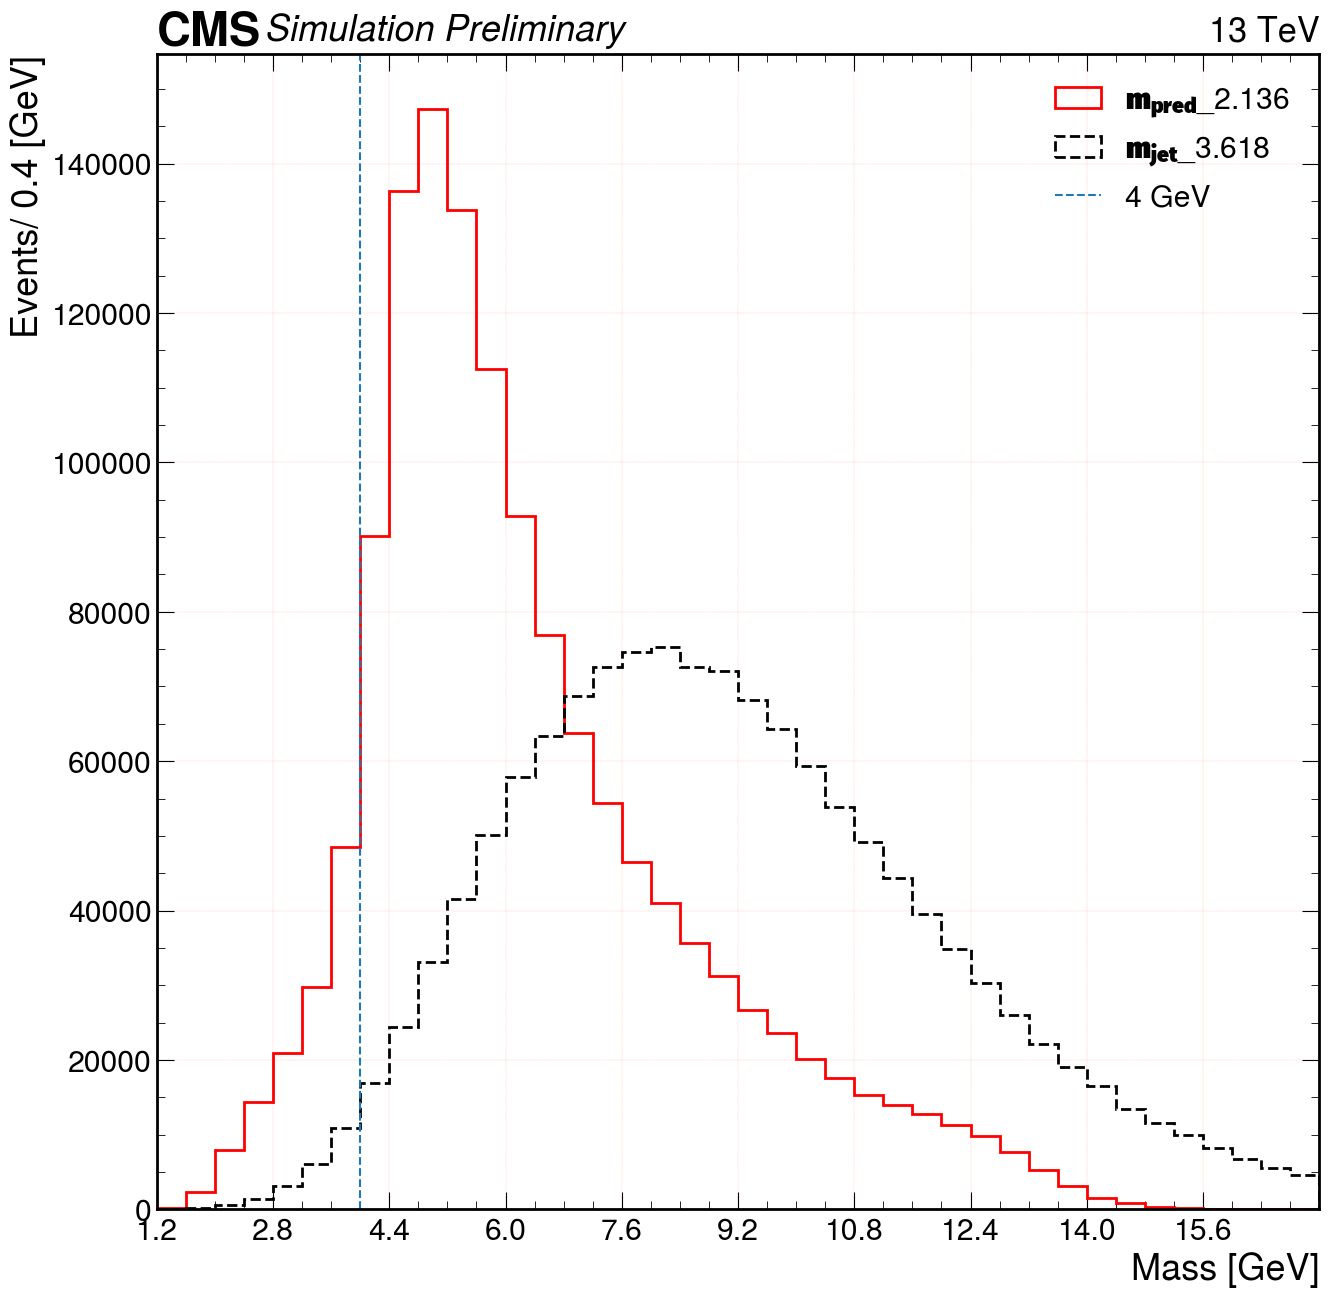

In [223]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.4762_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()


m_true_4 = data["m_true"]
m_pred_4 = data["m_pred"]
jet_mass4 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_4, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_4, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass4, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 4,linestyle='--',label=f'4 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


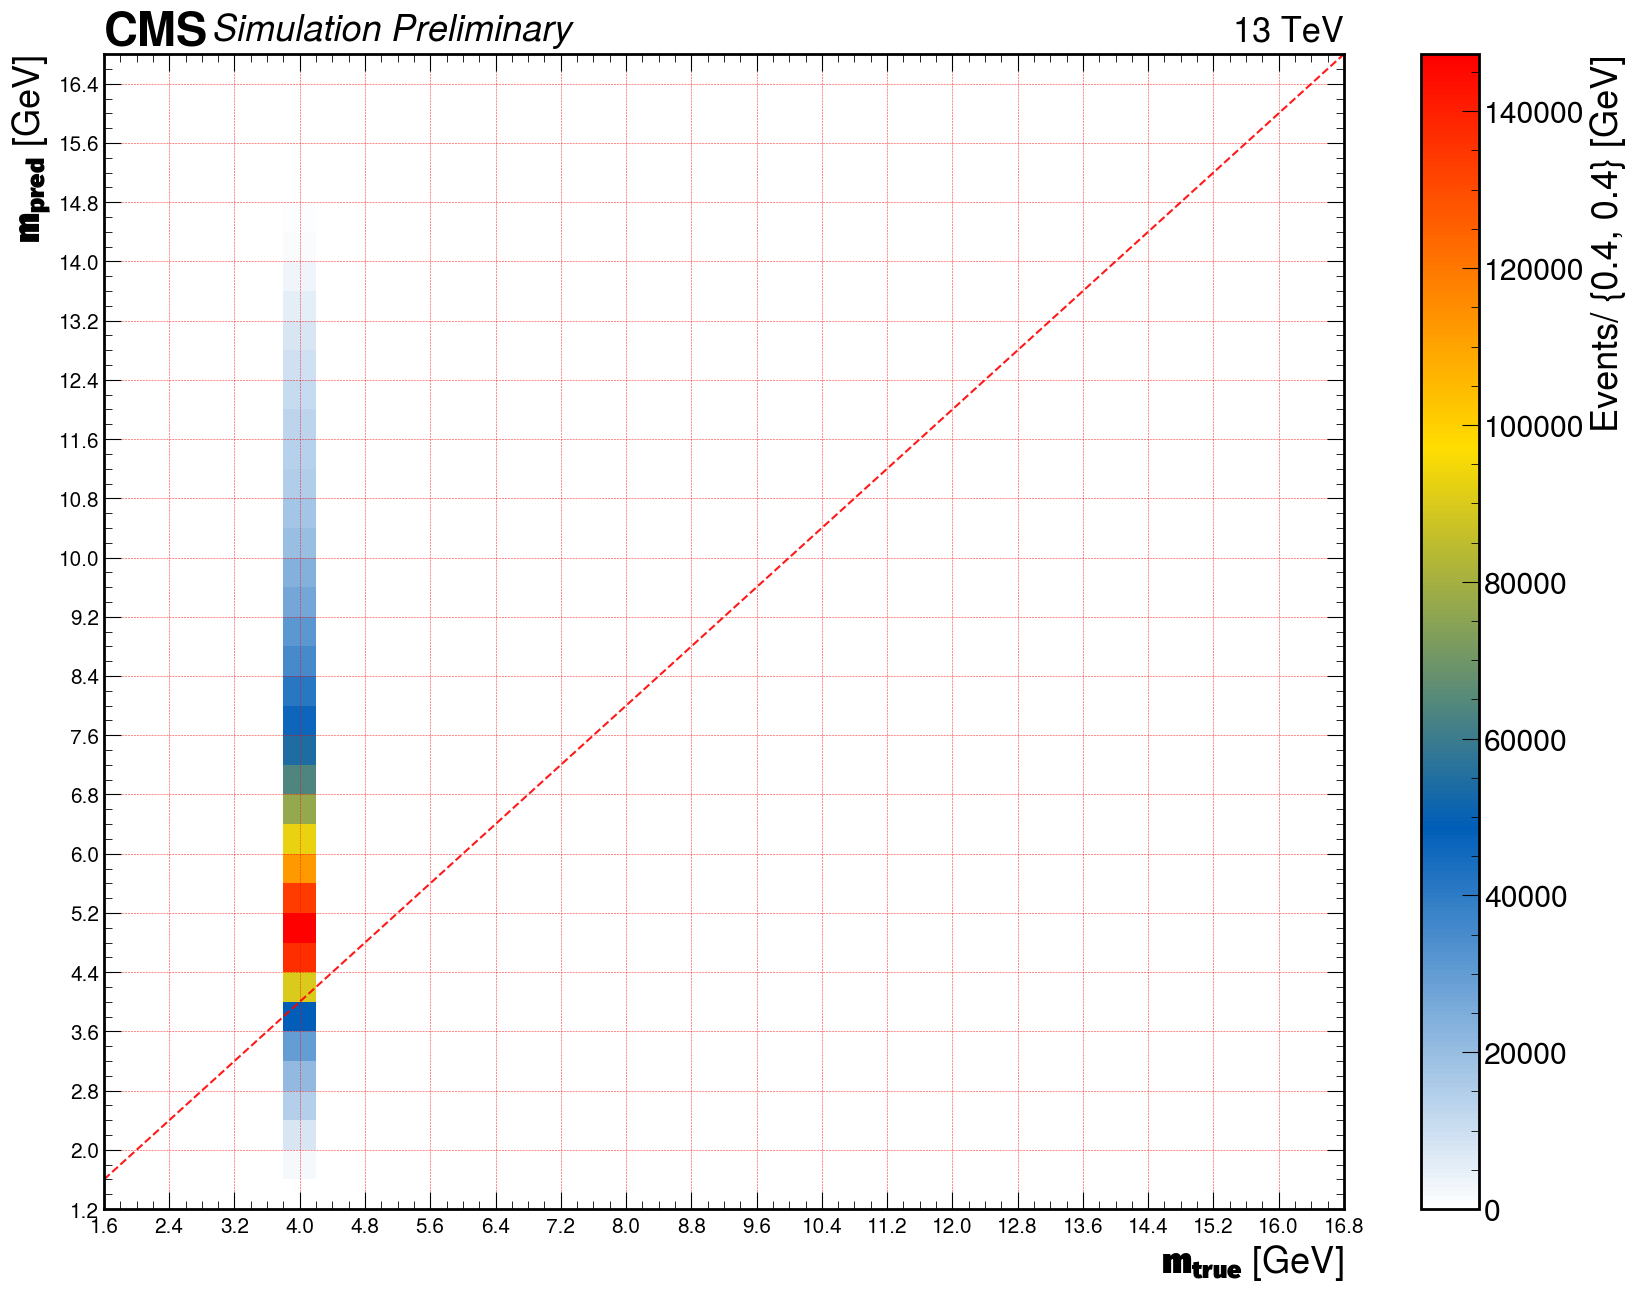

In [224]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_4), np.squeeze(m_pred_4), bins=[np.arange(m0_min-0.6, m0_max+1, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 5 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1577_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


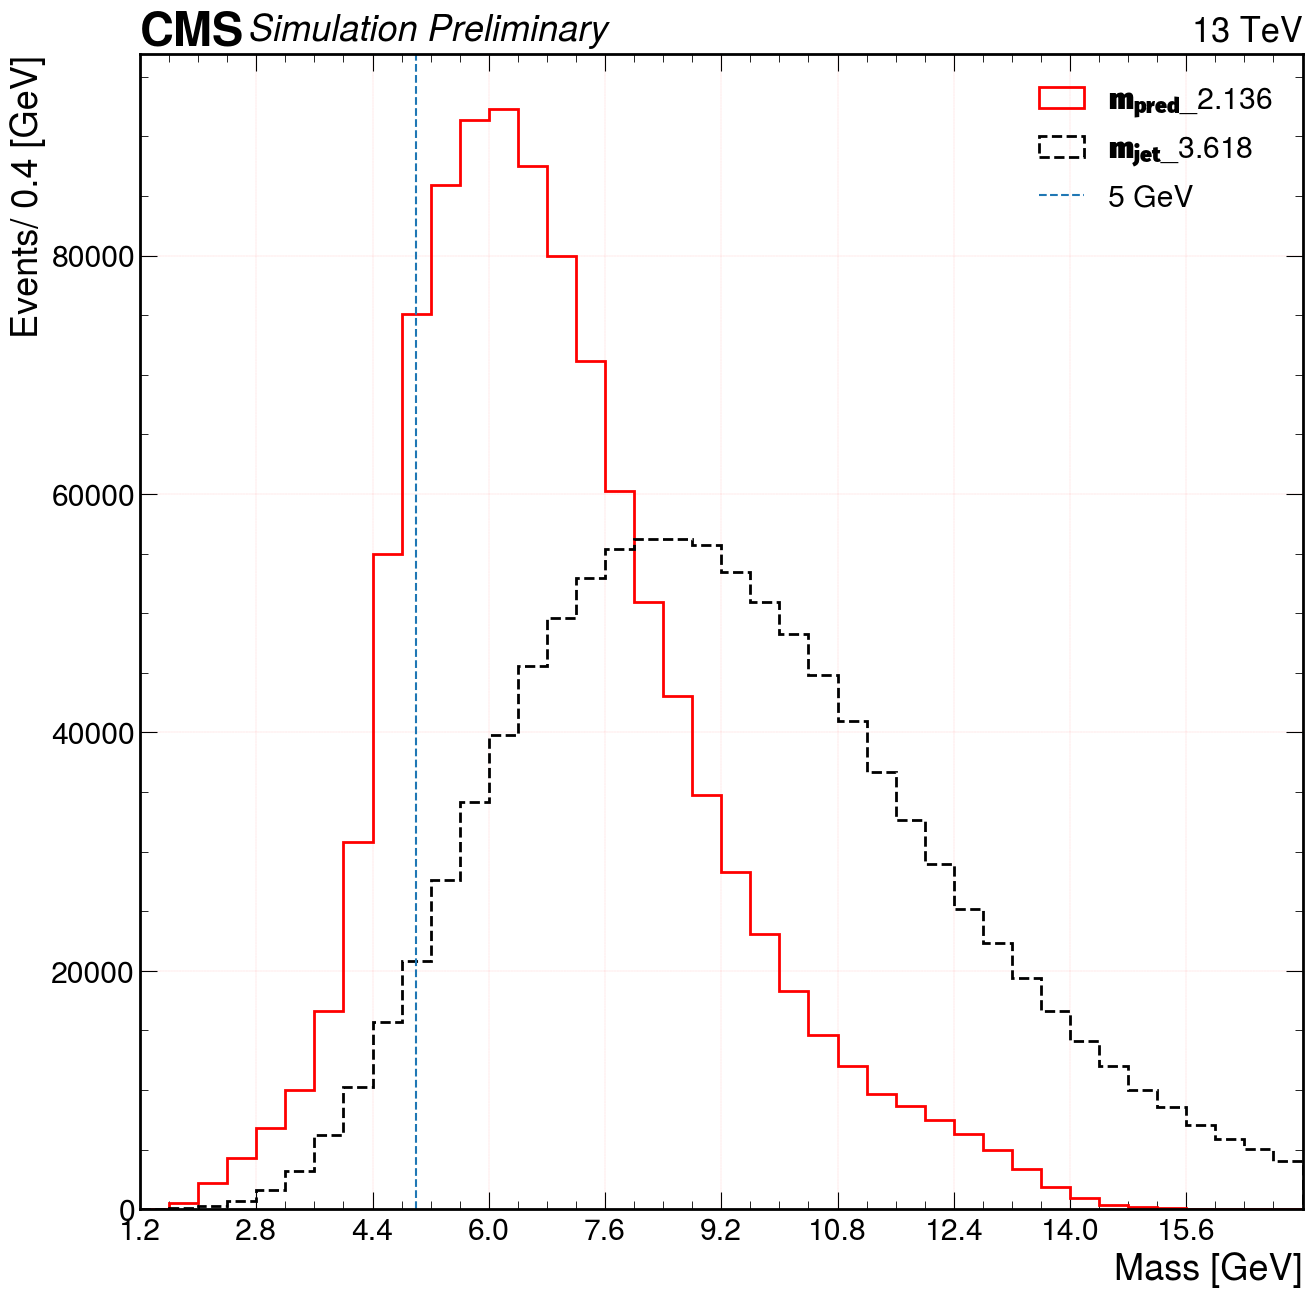

In [225]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1577_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_5 = data["m_true"]
m_pred_5 = data["m_pred"]
jet_mass5 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_5, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_5, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass5, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 5,linestyle='--',label=f'5 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


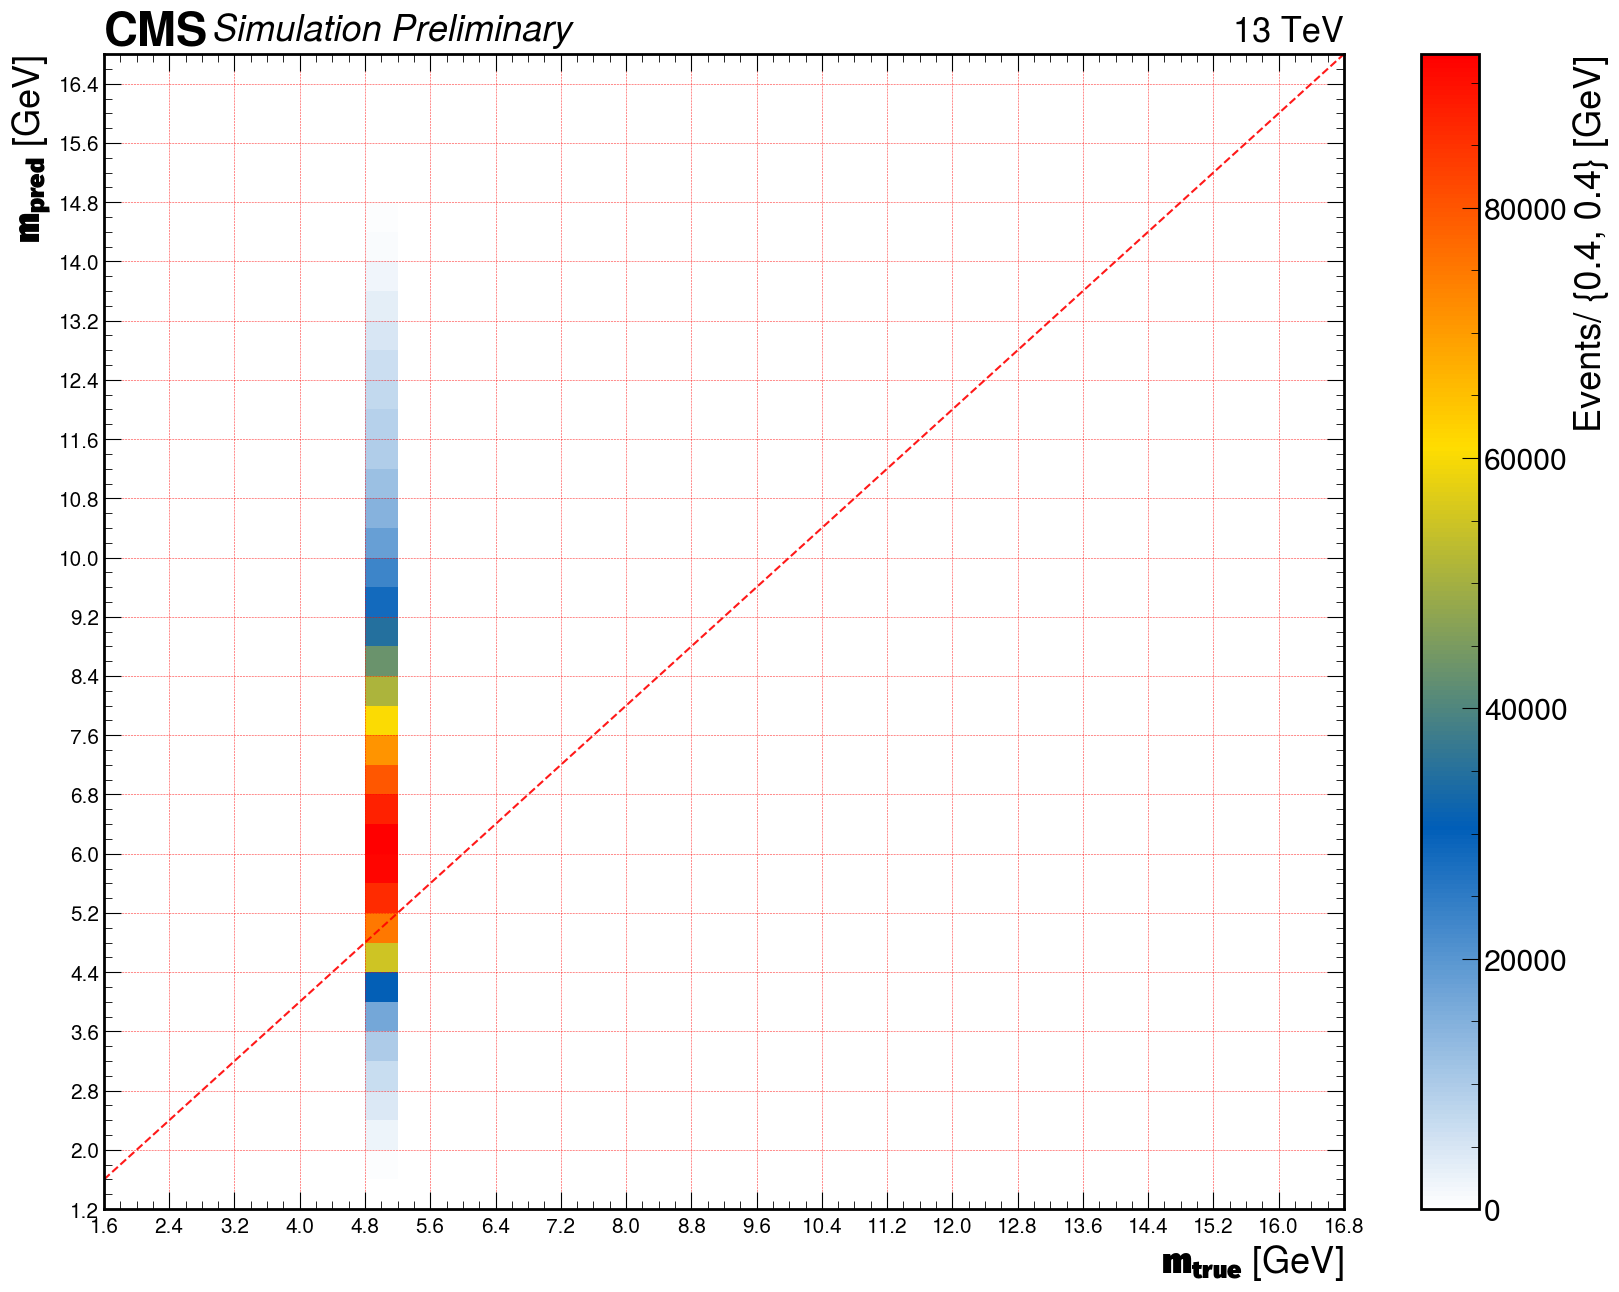

In [226]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_5), np.squeeze(m_pred_5), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 6 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


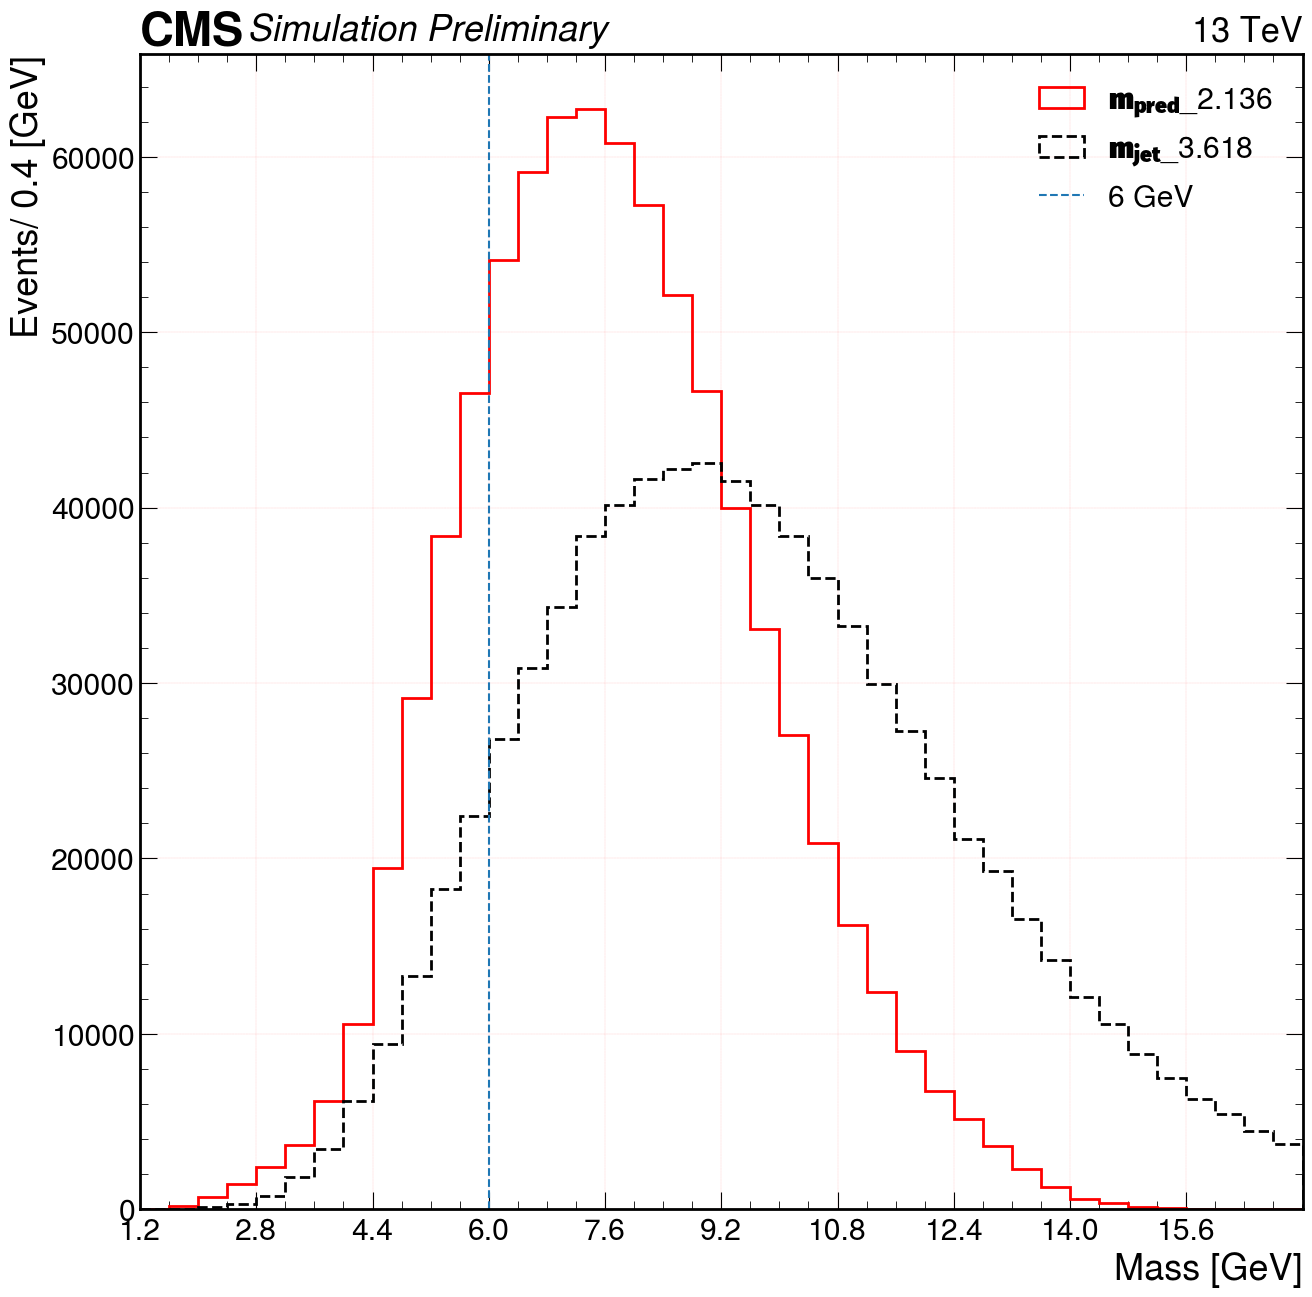

In [227]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.0949_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_6 = data["m_true"]
m_pred_6 = data["m_pred"]
jet_mass6 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_6, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass6, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 6,linestyle='--',label=f'6 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

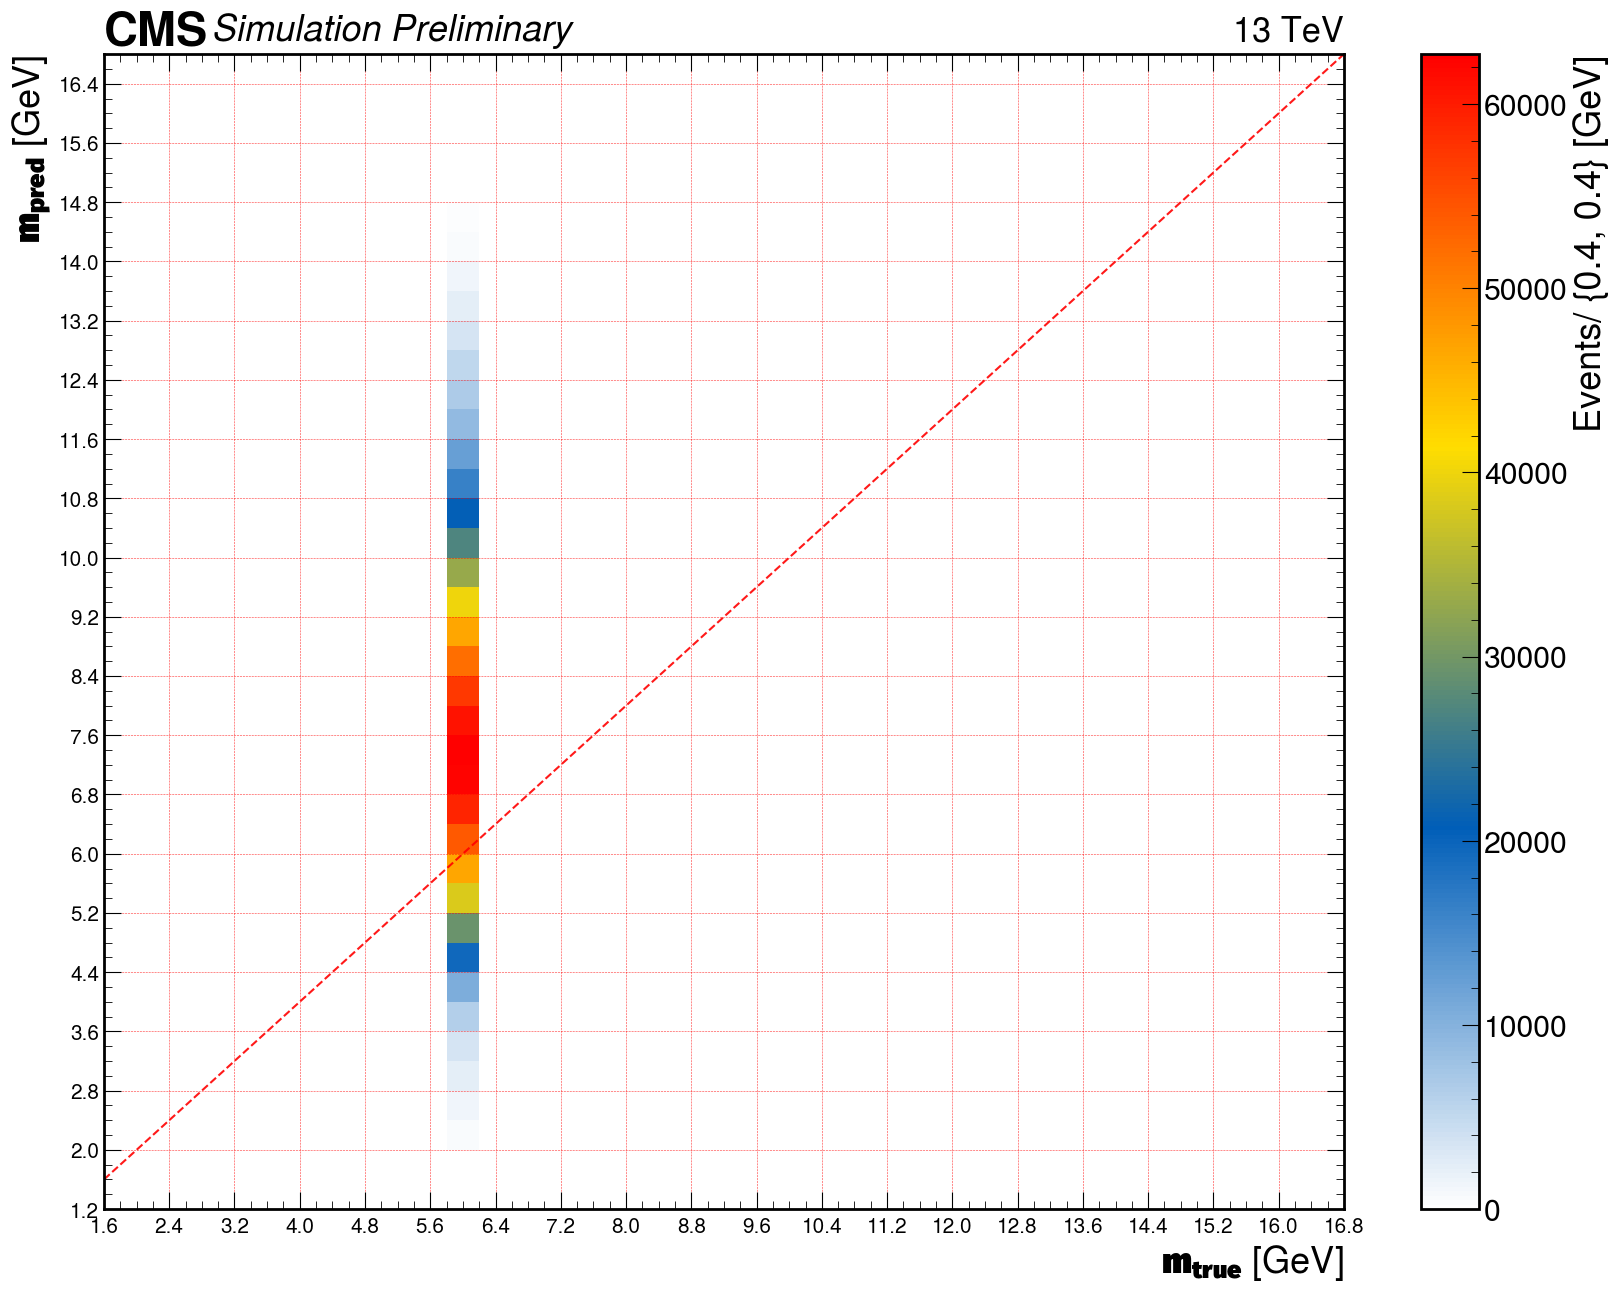

In [228]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_6), np.squeeze(m_pred_6), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass= 8 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1182_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


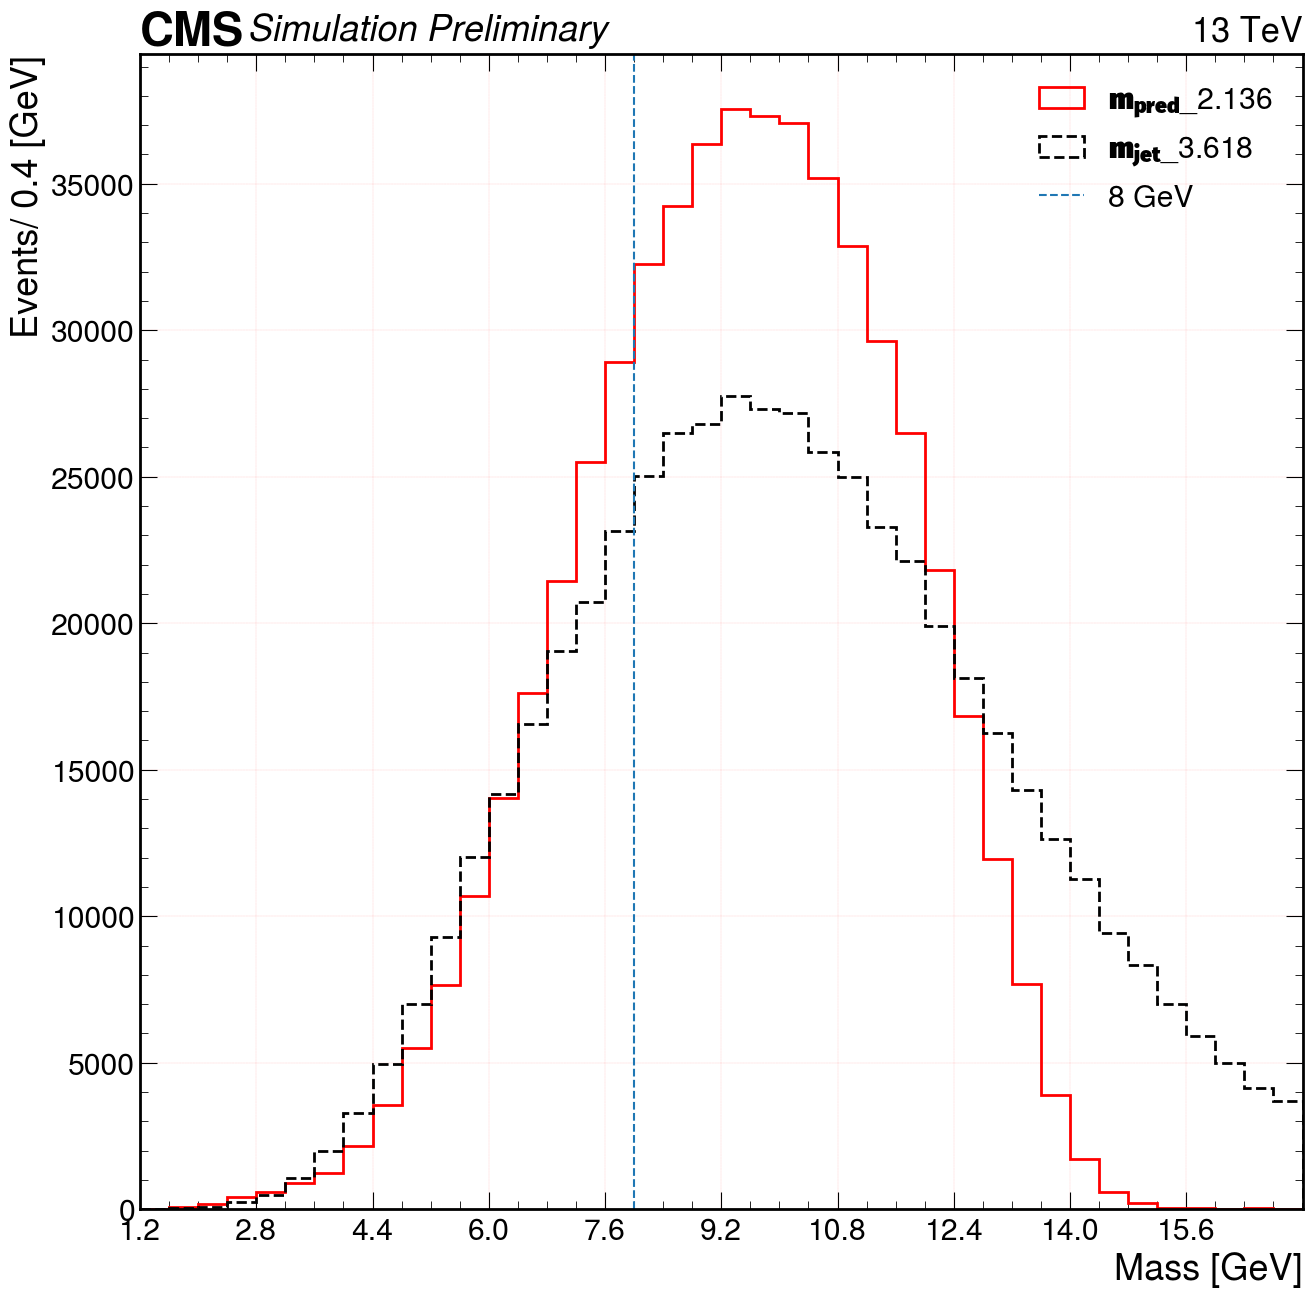

In [229]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch11_val_pseudoscalar_mae2.1182_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_8 = data["m_true"]
m_pred_8 = data["m_pred"]
jet_mass8 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_8, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass8, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 8,linestyle='--',label=f'8 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

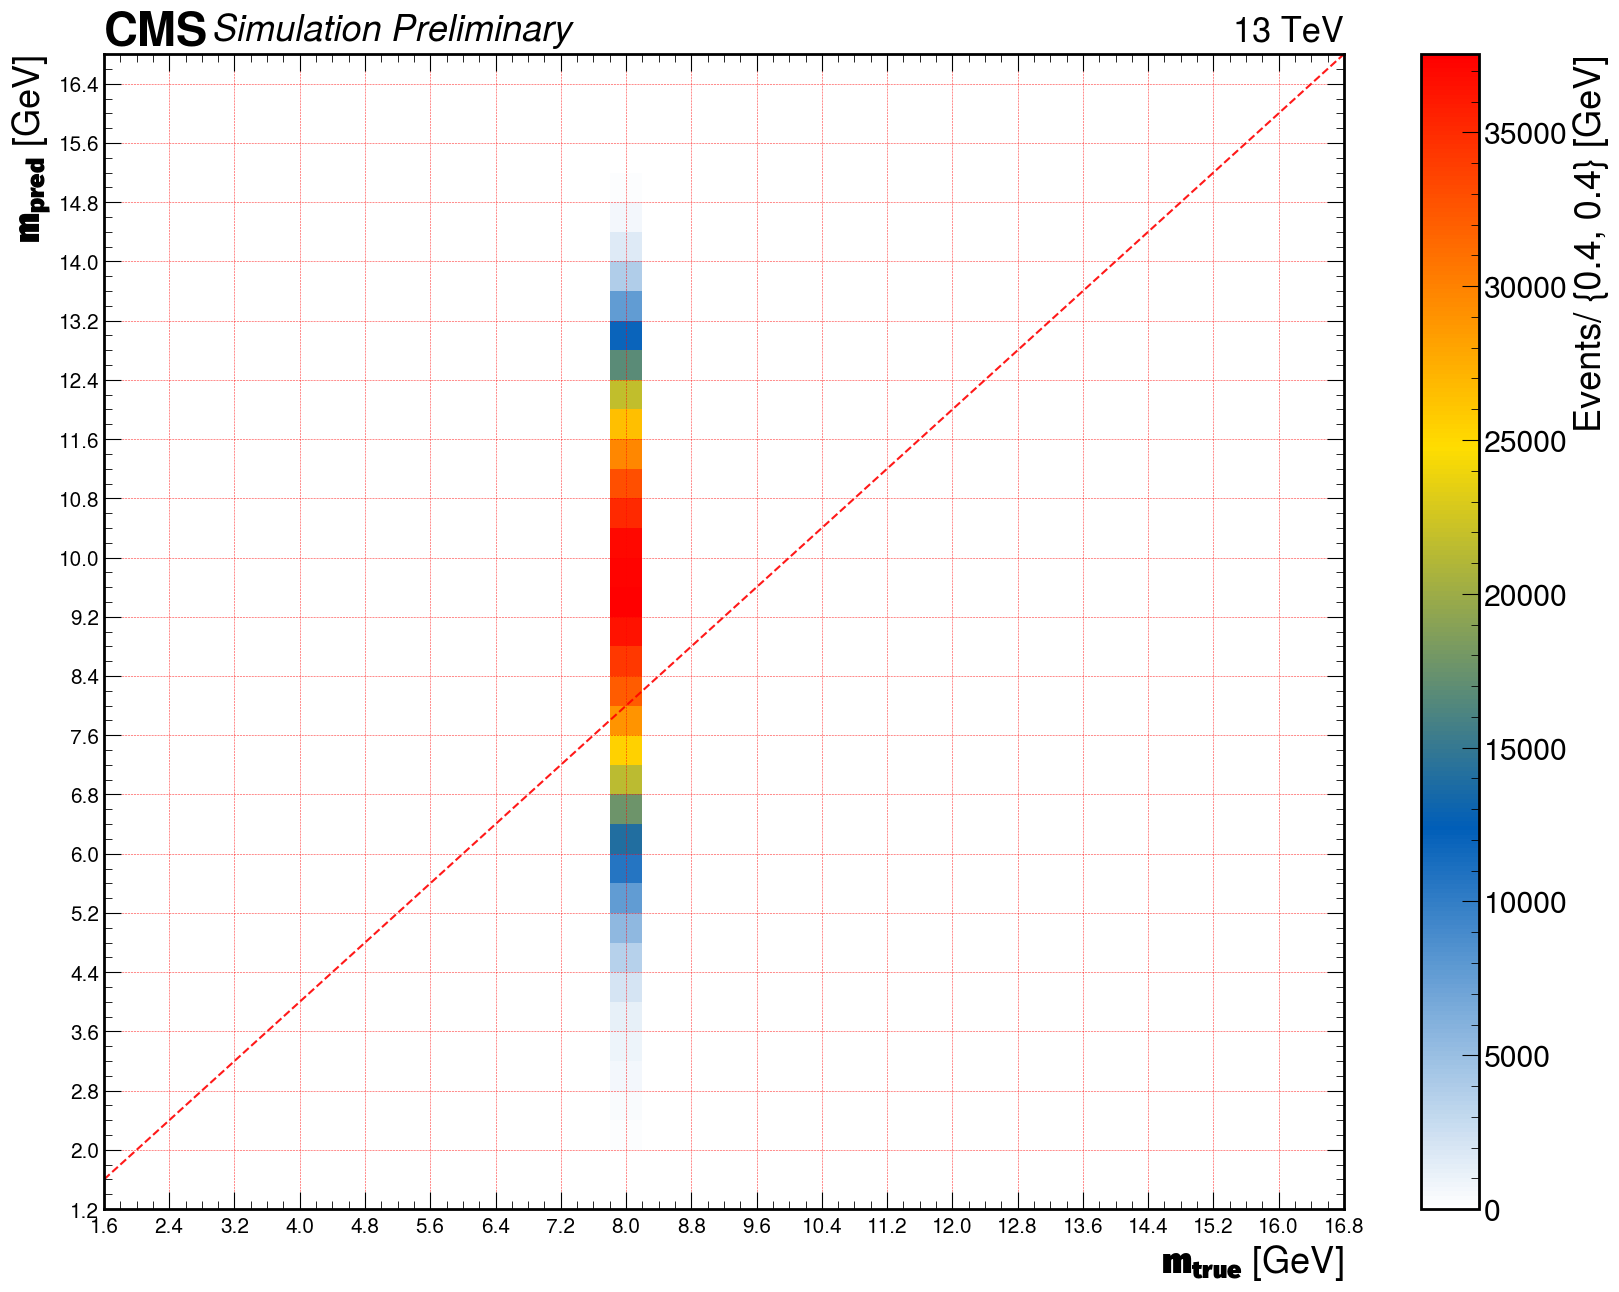

In [230]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_8), np.squeeze(m_pred_8), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass =10 Gev

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.9849_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


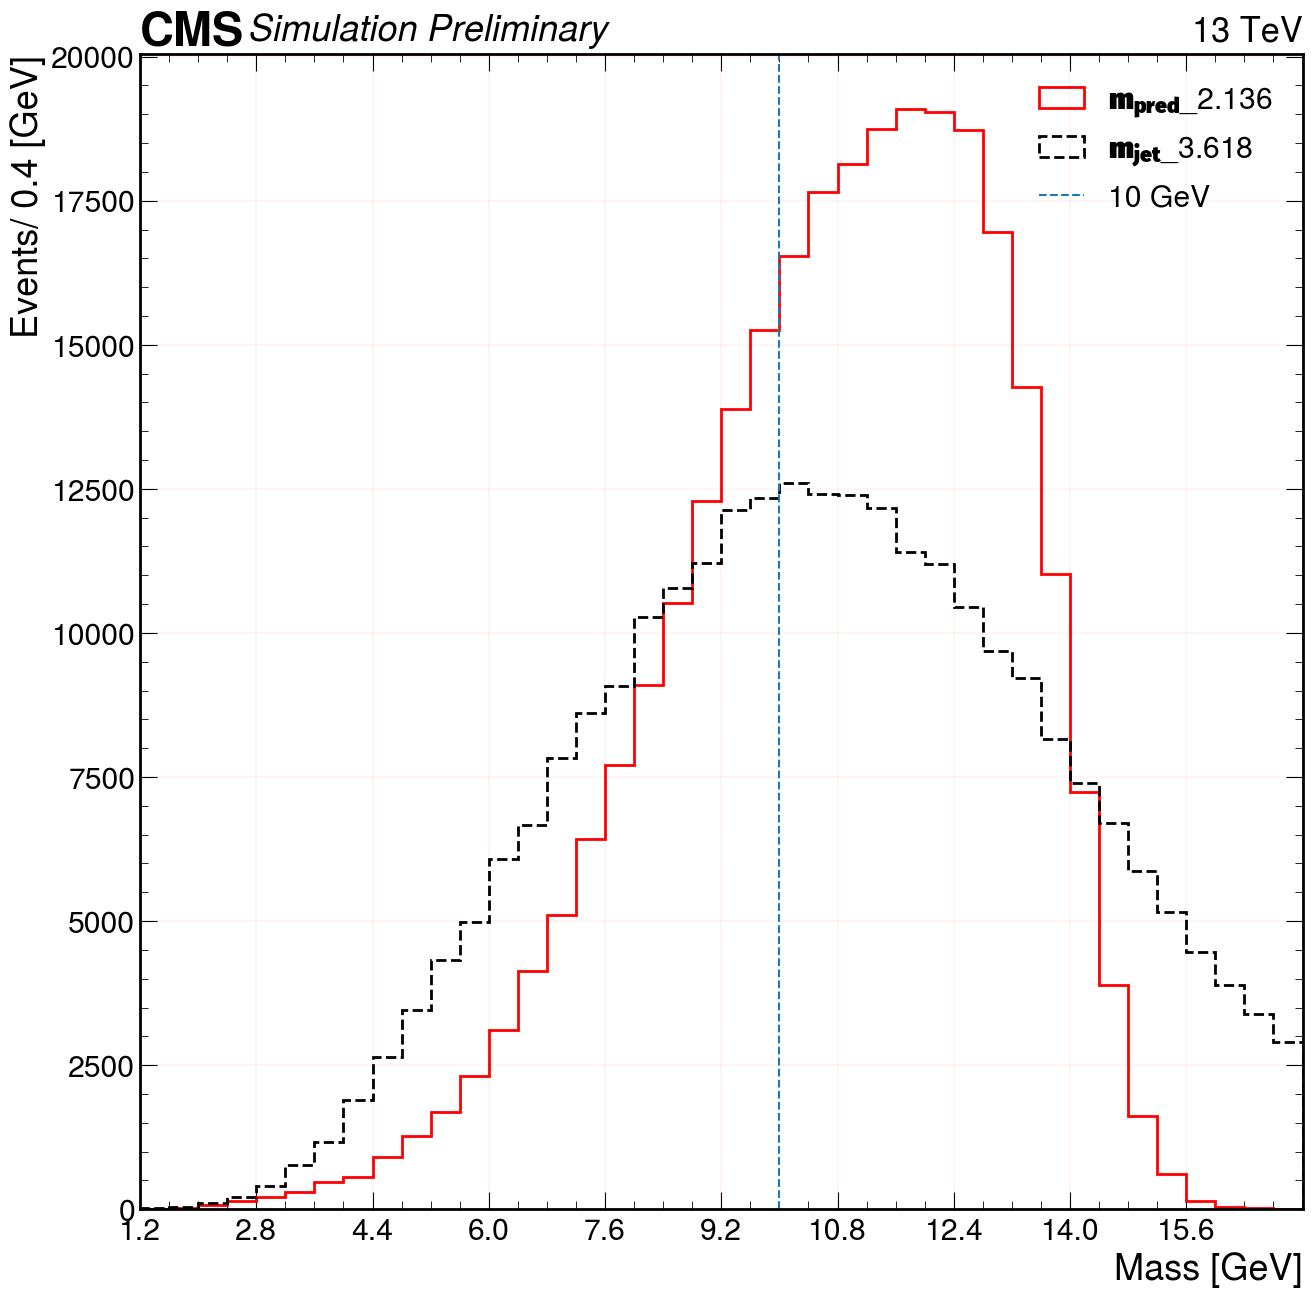

In [231]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.9849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_10 = data["m_true"]
m_pred_10 = data["m_pred"]
jet_mass10 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_10, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass10, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 10,linestyle='--',label=f'10 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


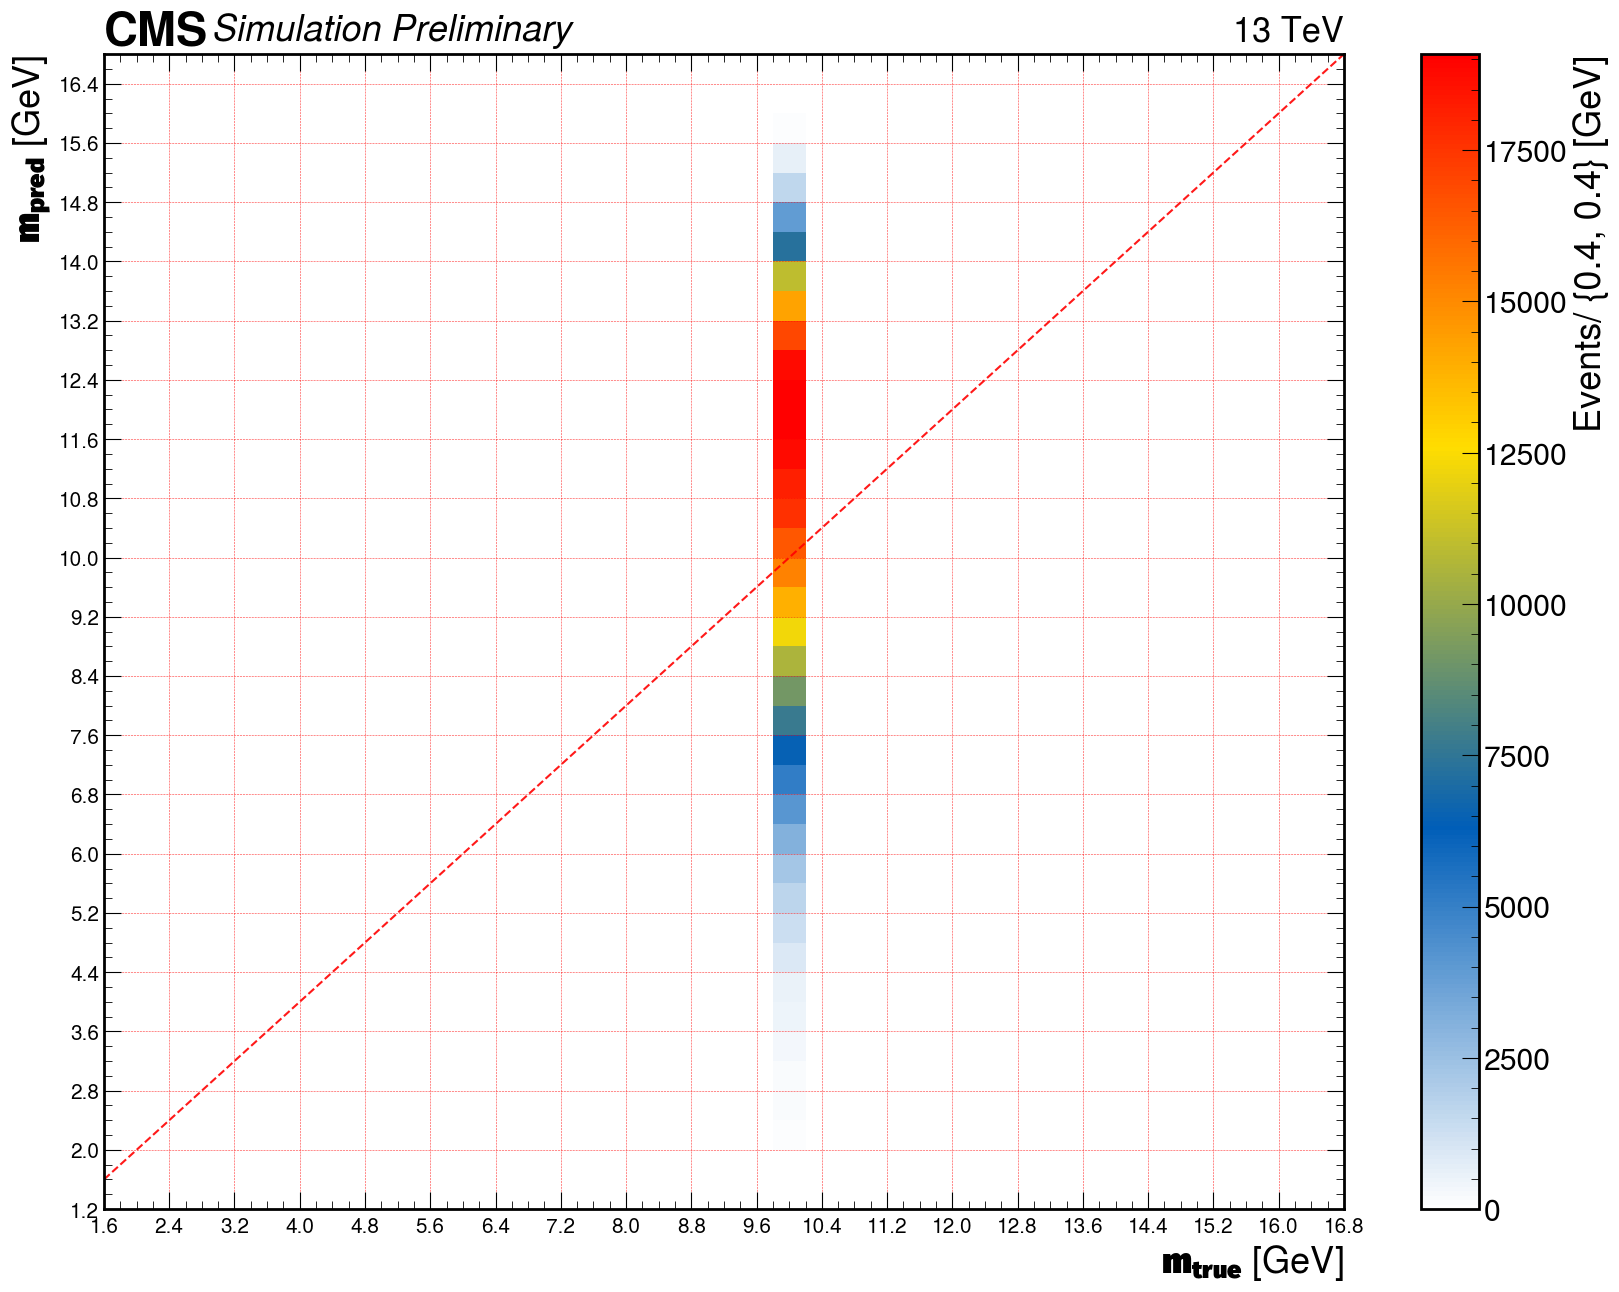

In [232]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_10), np.squeeze(m_pred_10), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal M = 12 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8464_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


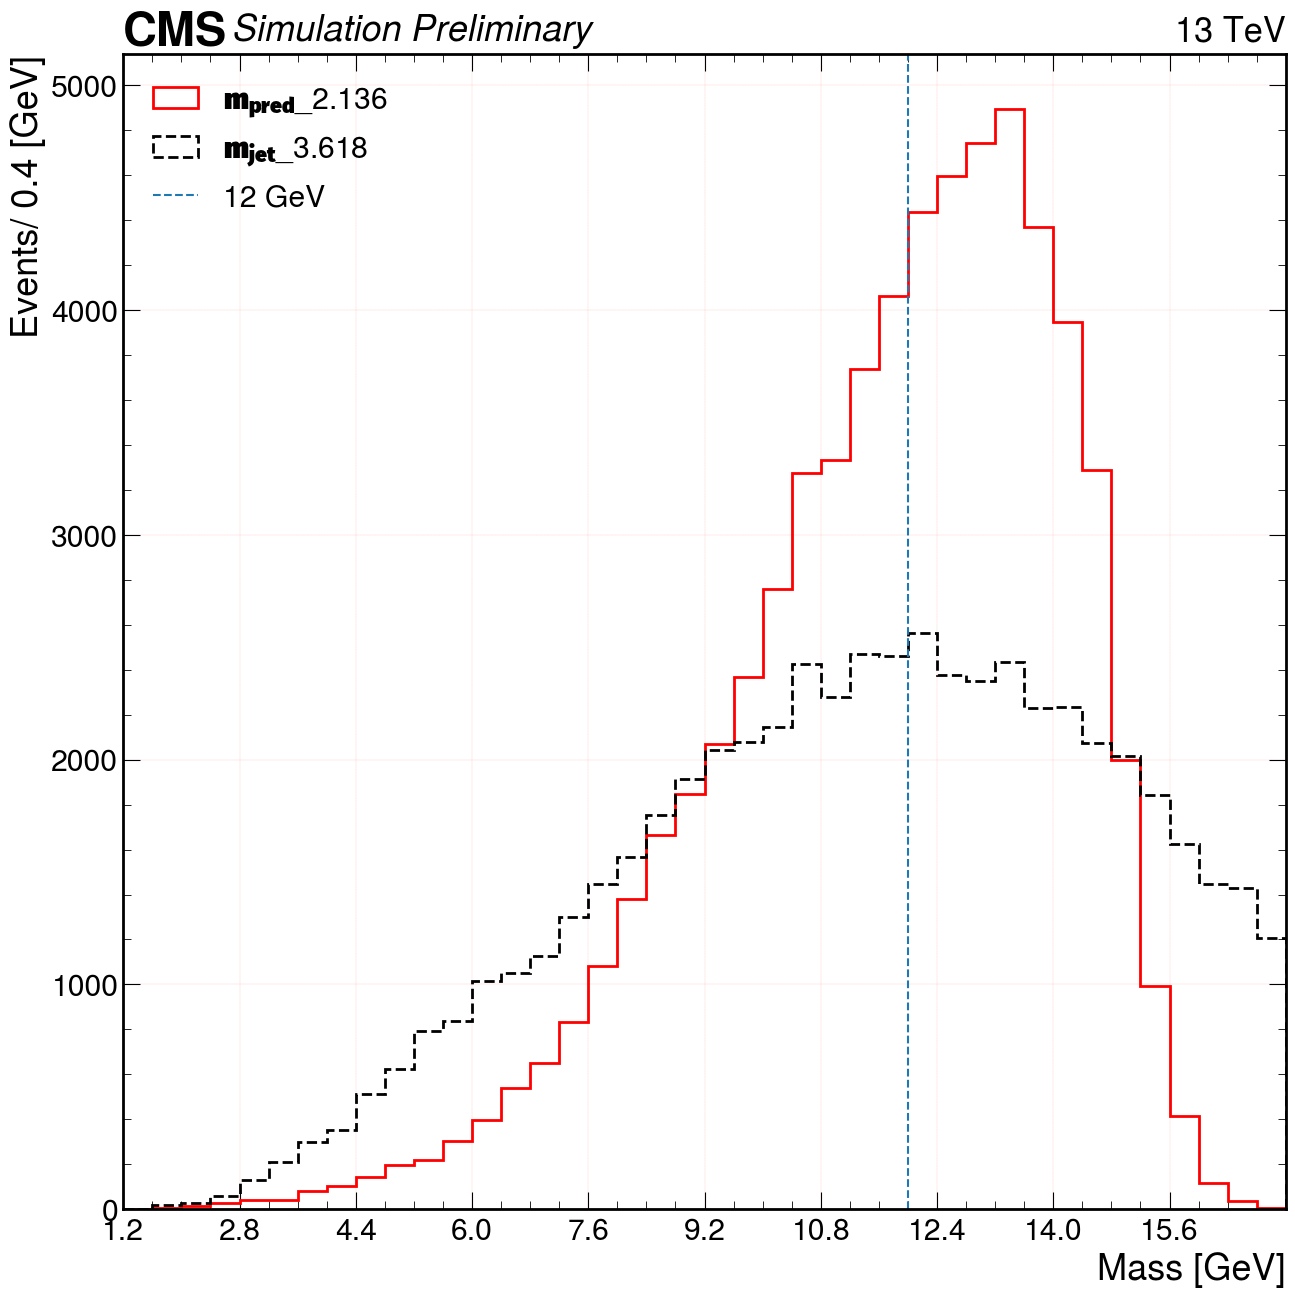

In [256]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8464_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_12 = data["m_true"]
m_pred_12 = data["m_pred"]
jet_mass12 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4



# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_12, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass12, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 12,linestyle='--',label=f'12 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


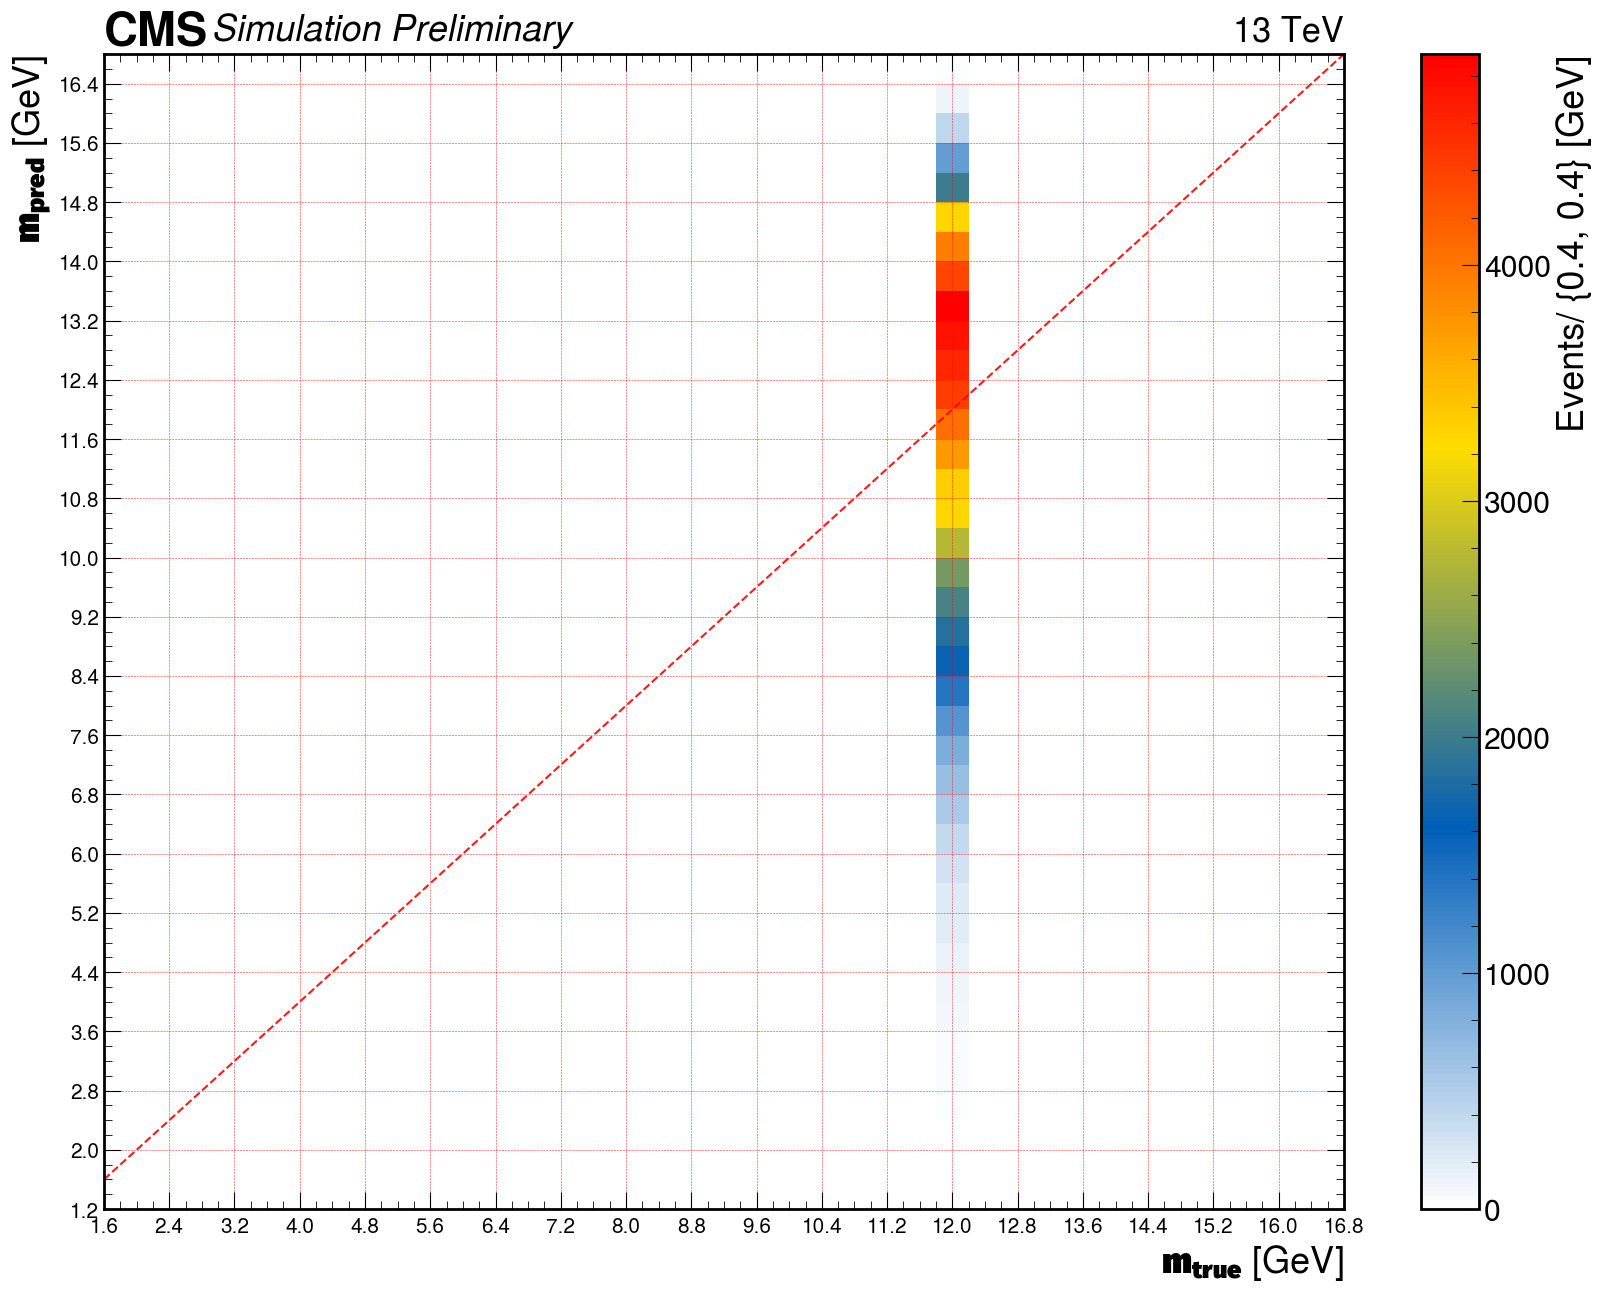

In [257]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_12), np.squeeze(m_pred_12), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal M=14 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8898_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


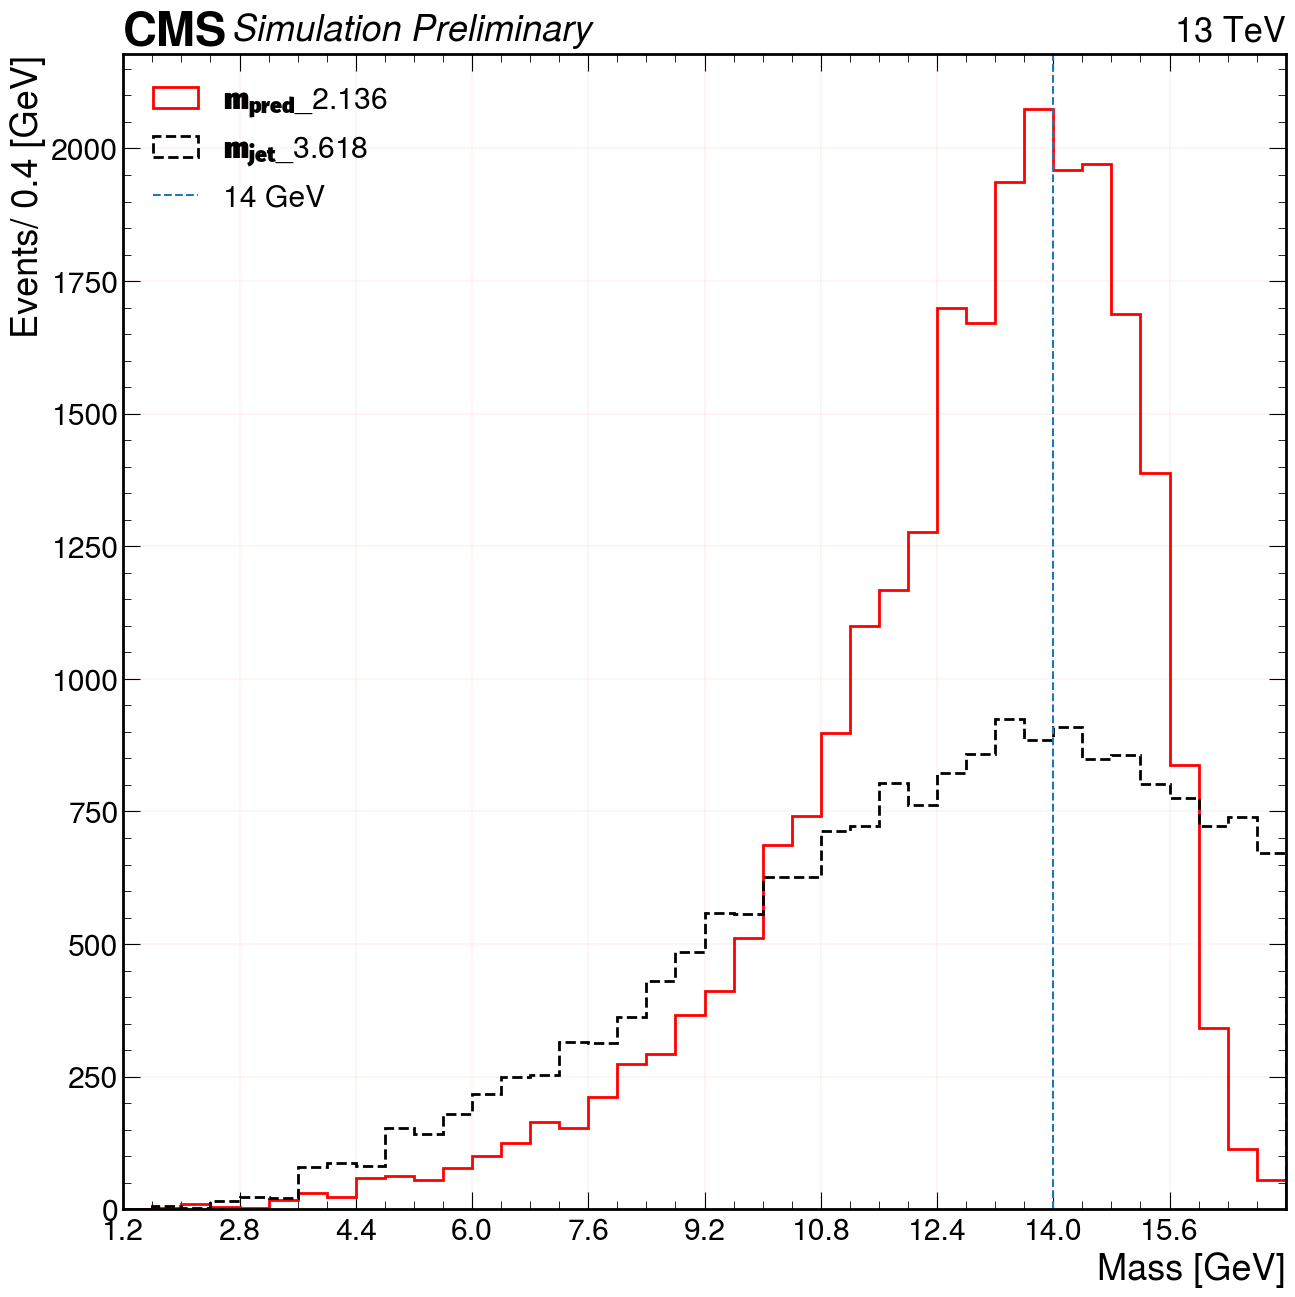

In [235]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch11_val_pseudoscalar_mae1.8898_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_14 = data["m_true"]
m_pred_14 = data["m_pred"]
jet_mass14 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)
# bin_width=0.4



# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_14, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass14, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 14,linestyle='--',label=f'14 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend()
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

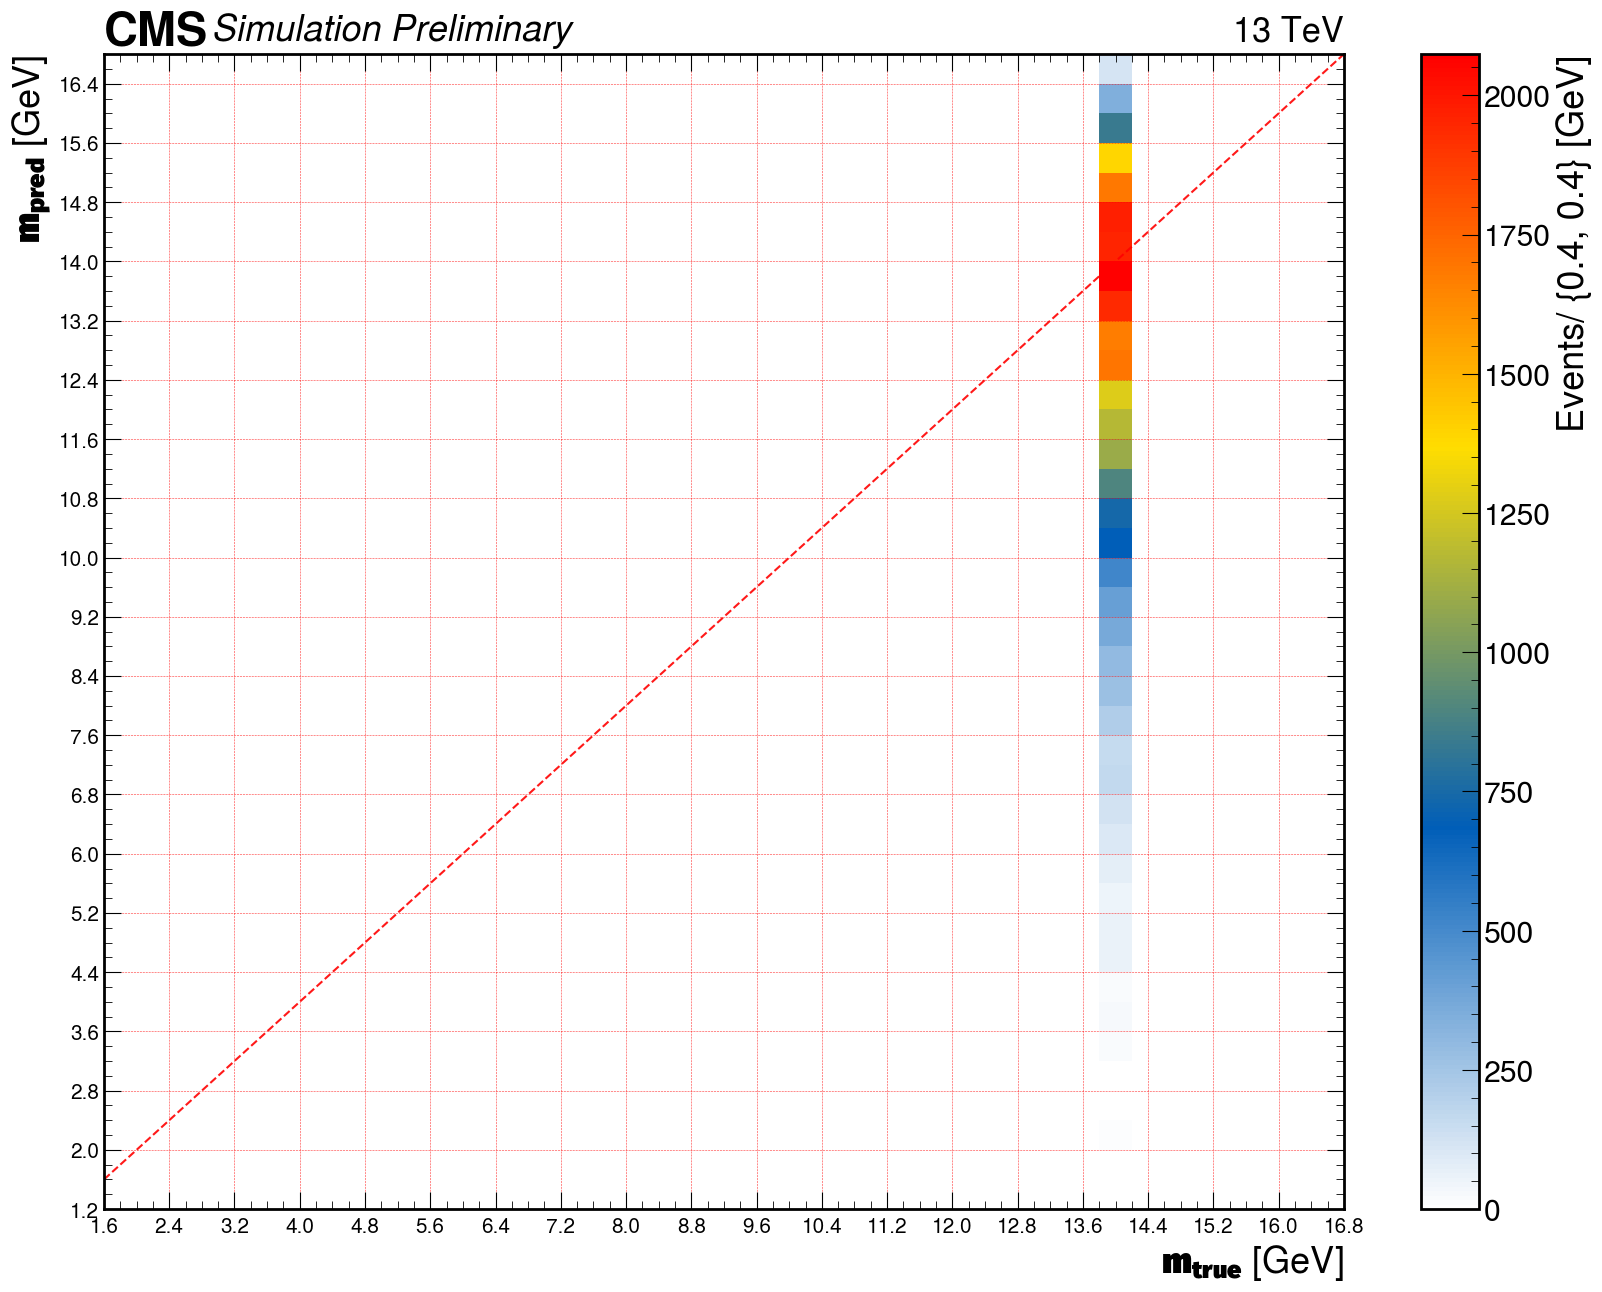

In [236]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_14), np.squeeze(m_pred_14), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# ---- mass_trainer_aToTauTau_m1p2To17p2_v2_13ch ---

# U to 2tau validation sample

In [237]:
bin_width=0.4

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch9_val_pseudoscalar_mae2.0971_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


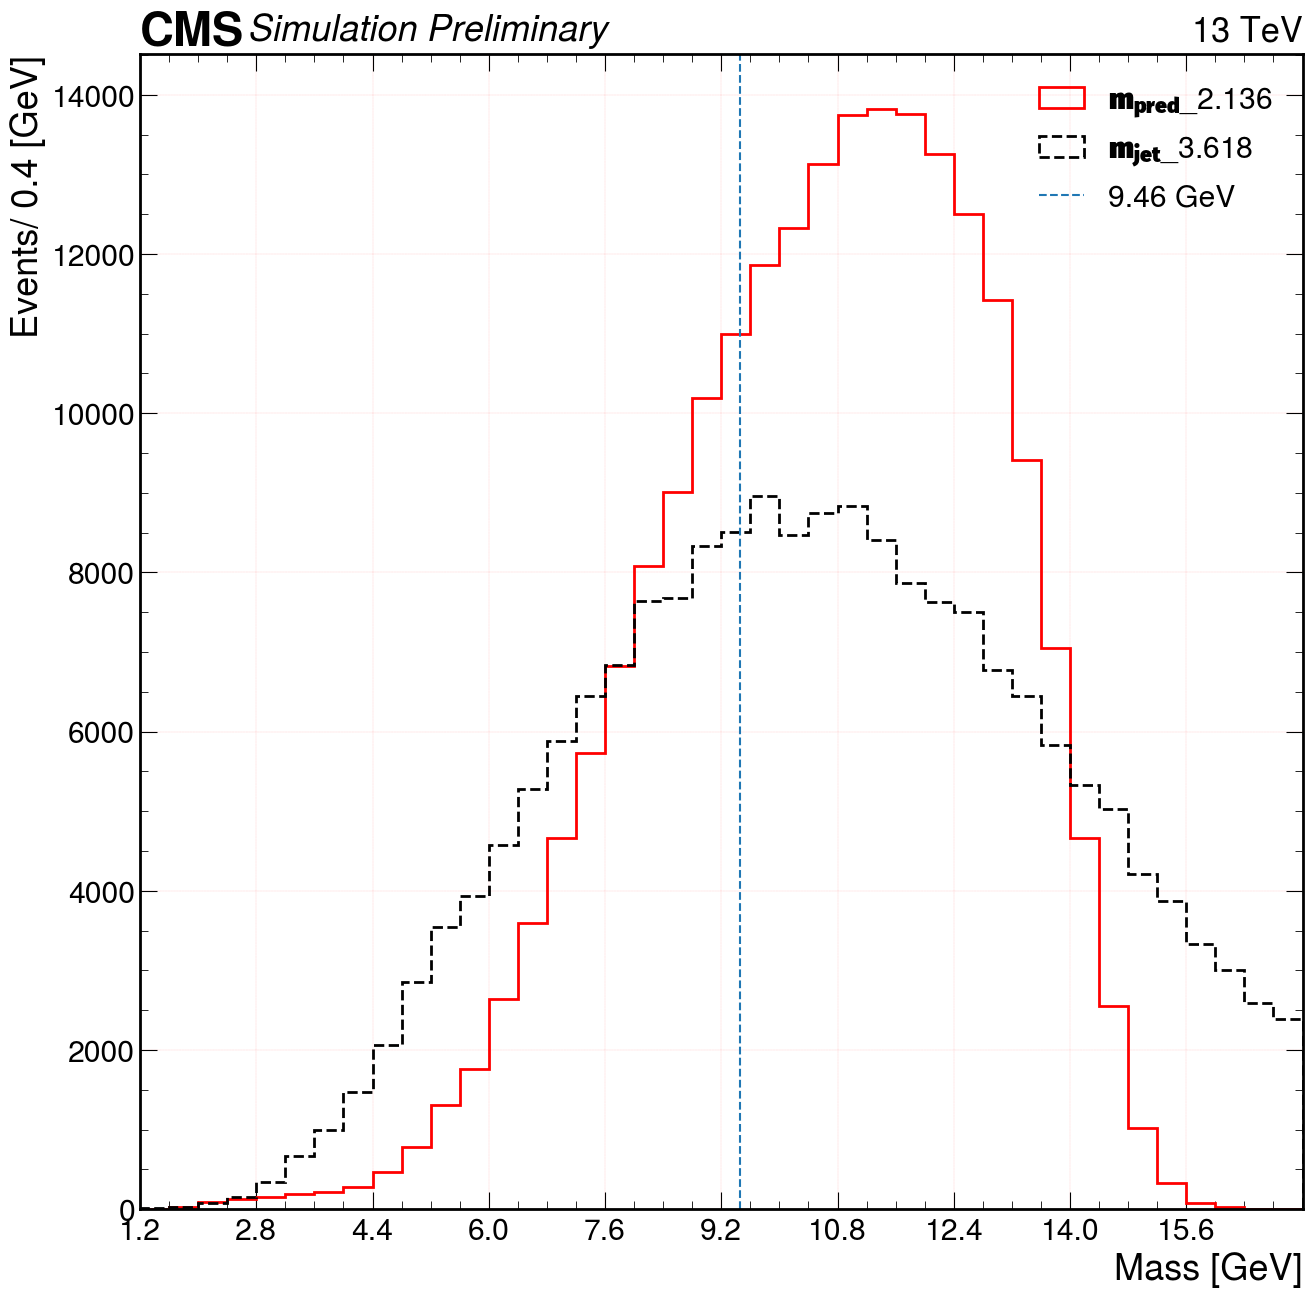

In [238]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch9_val_pseudoscalar_mae2.0971_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_u = data["m_true"]
m_pred_u = data["m_pred"]
jet_massu = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_u, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_massu, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


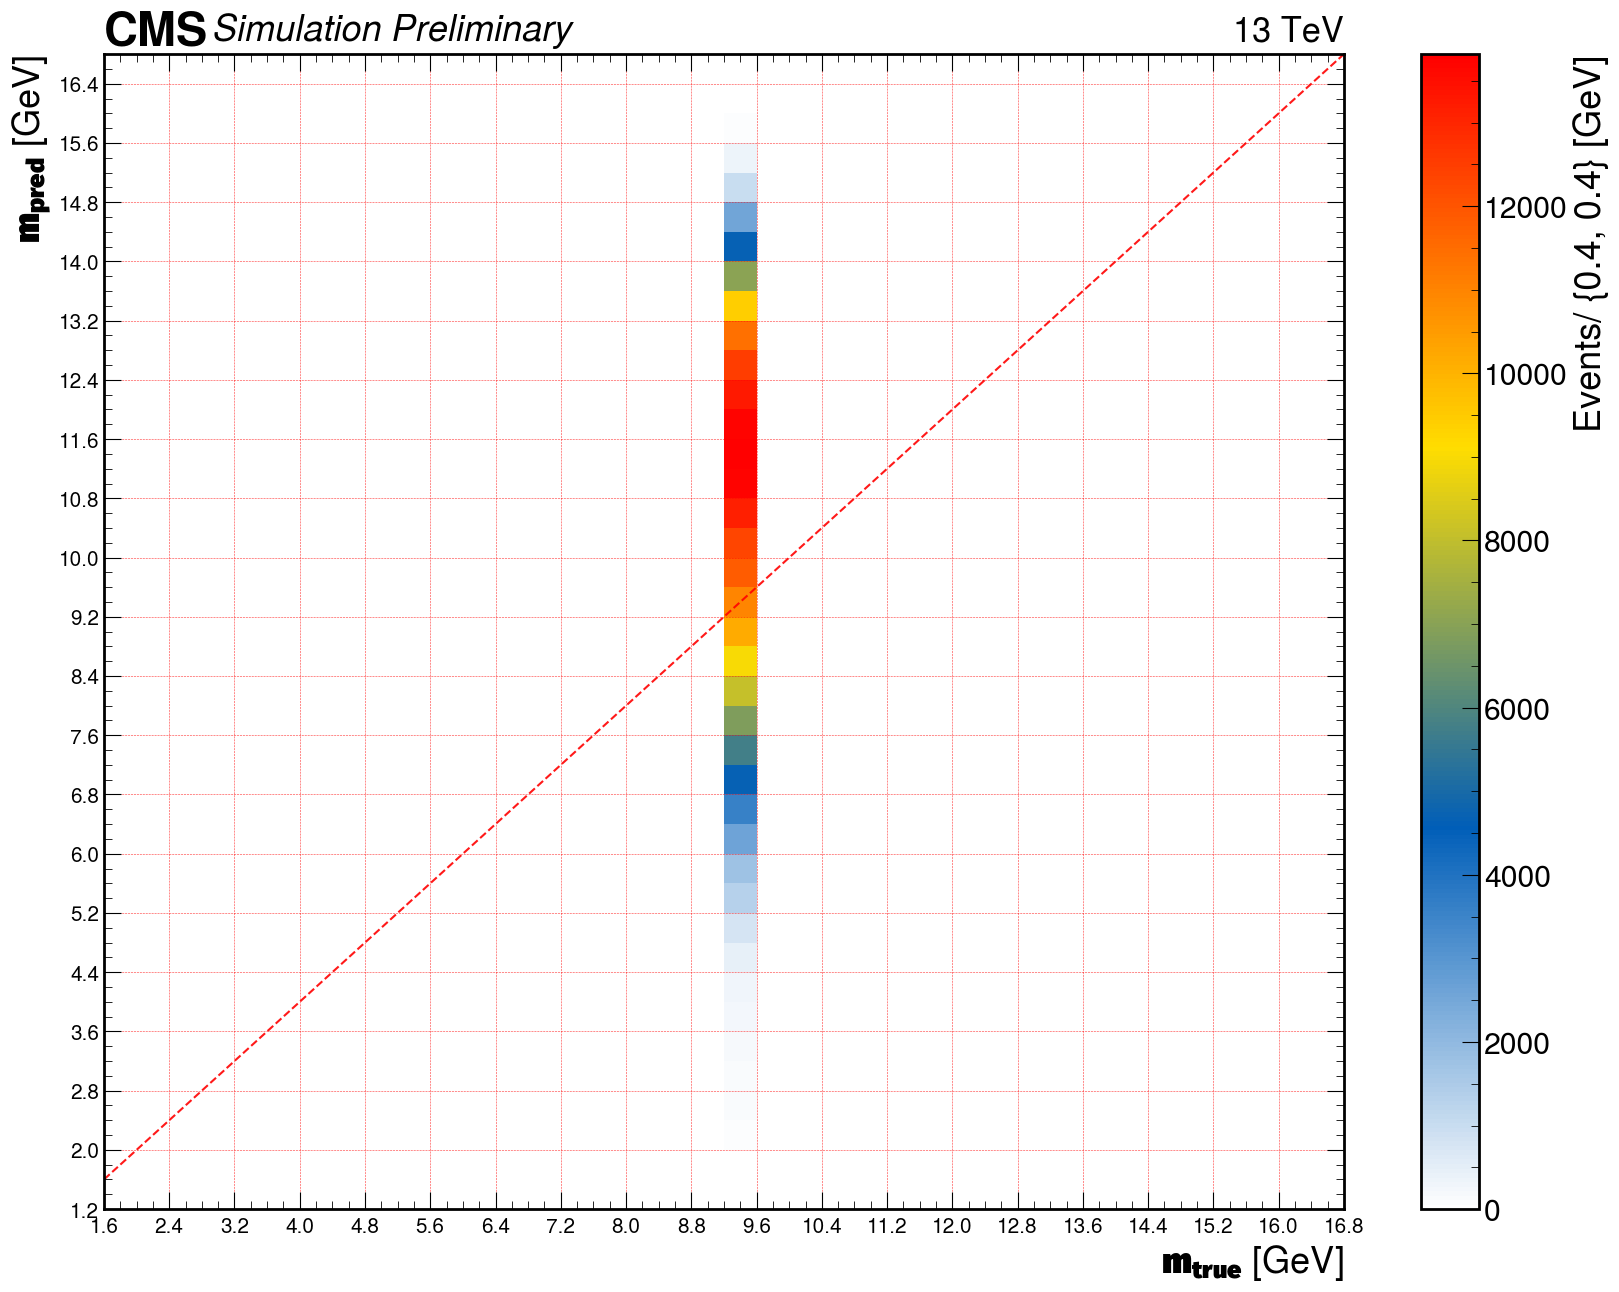

In [239]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_u), np.squeeze(m_pred_u), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass=3.7 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.6245_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


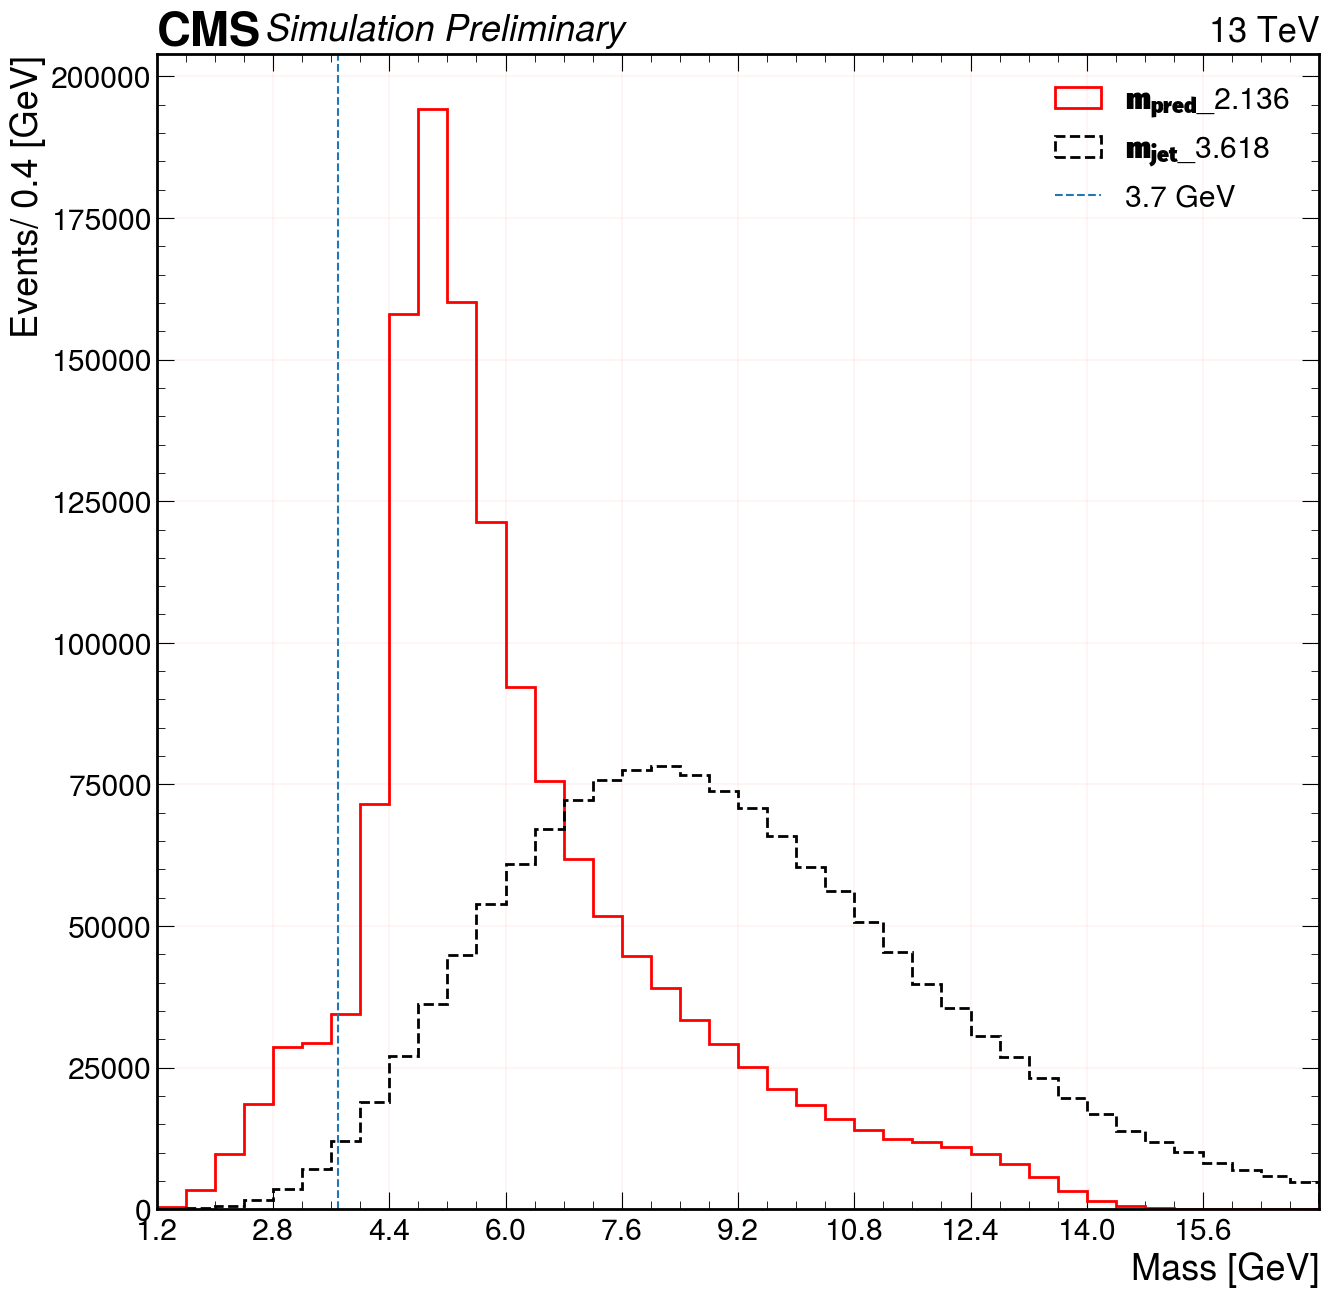

In [240]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.6245_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_3 = data["m_true"]
m_pred_3 = data["m_pred"]
jet_mass3 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 3.7,linestyle='--',label=f'3.7 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

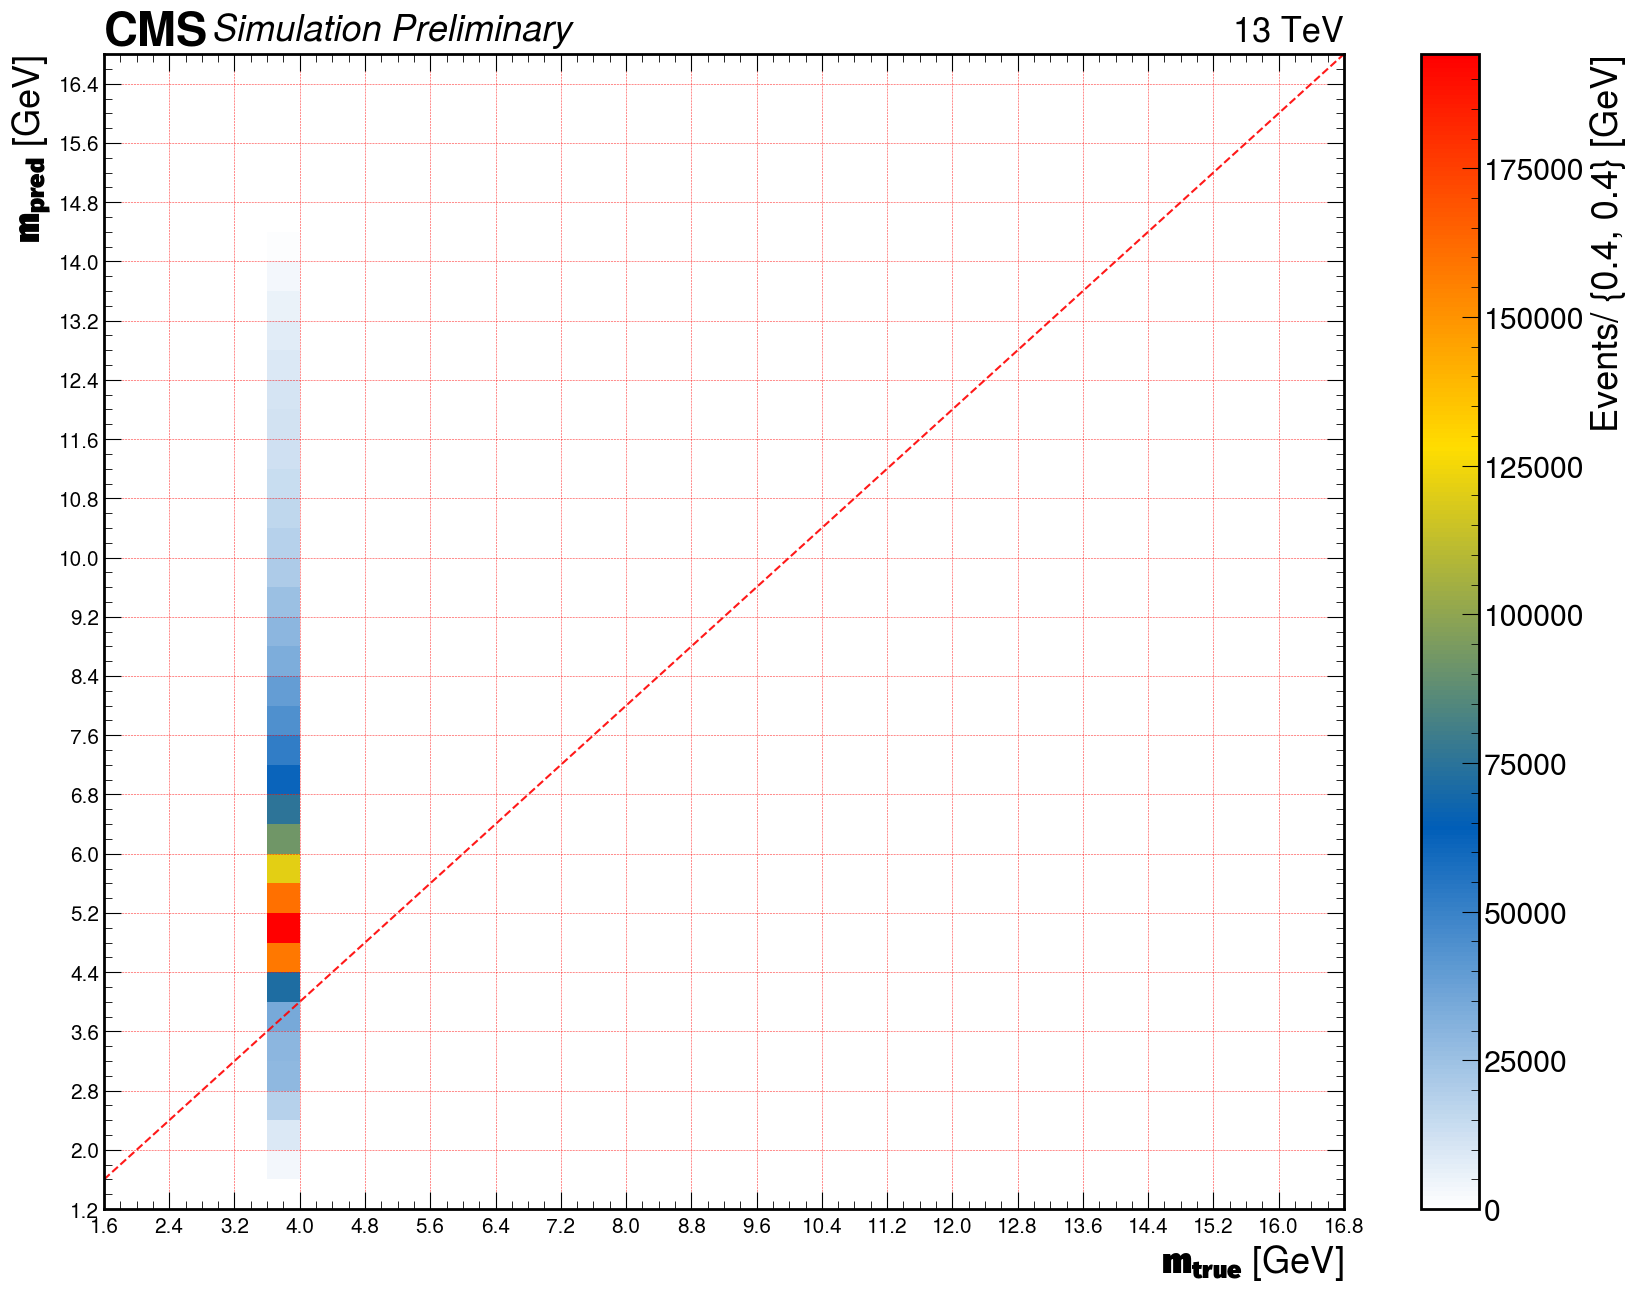

In [241]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_3), np.squeeze(m_pred_3), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 4 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.4009_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


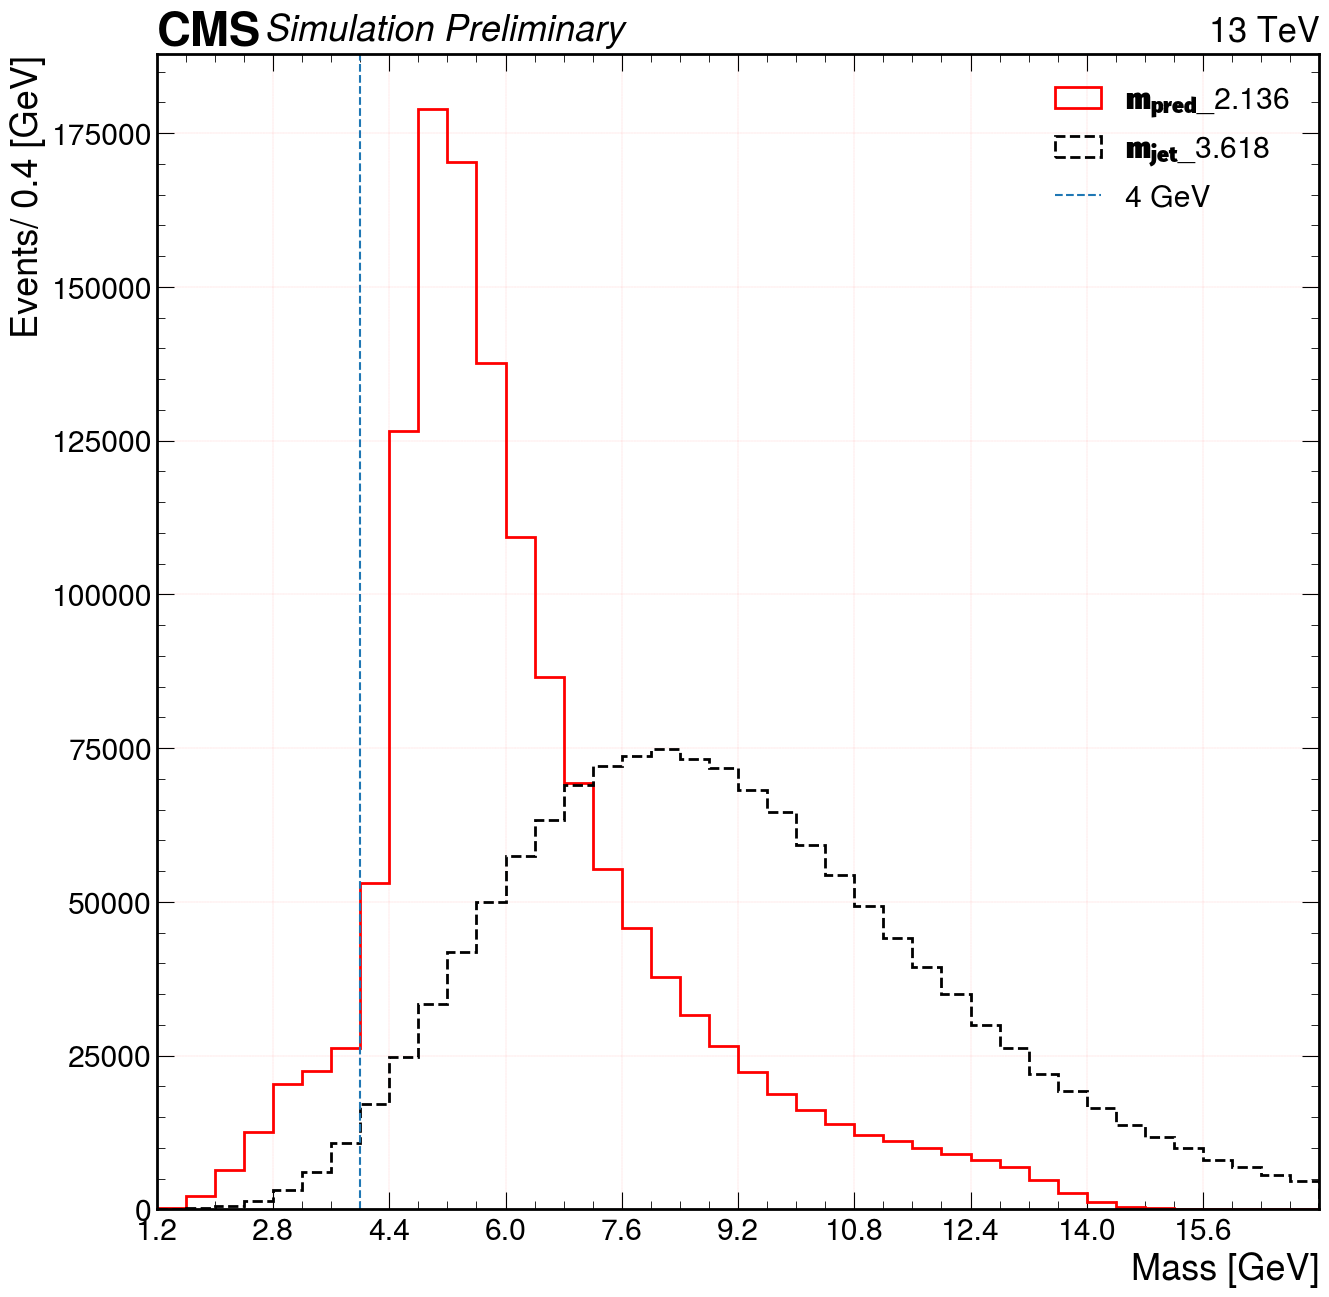

In [242]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.4009_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_4 = data["m_true"]
m_pred_4 = data["m_pred"]
jet_mass4 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_4, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass4, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 4,linestyle='--',label=f'4 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

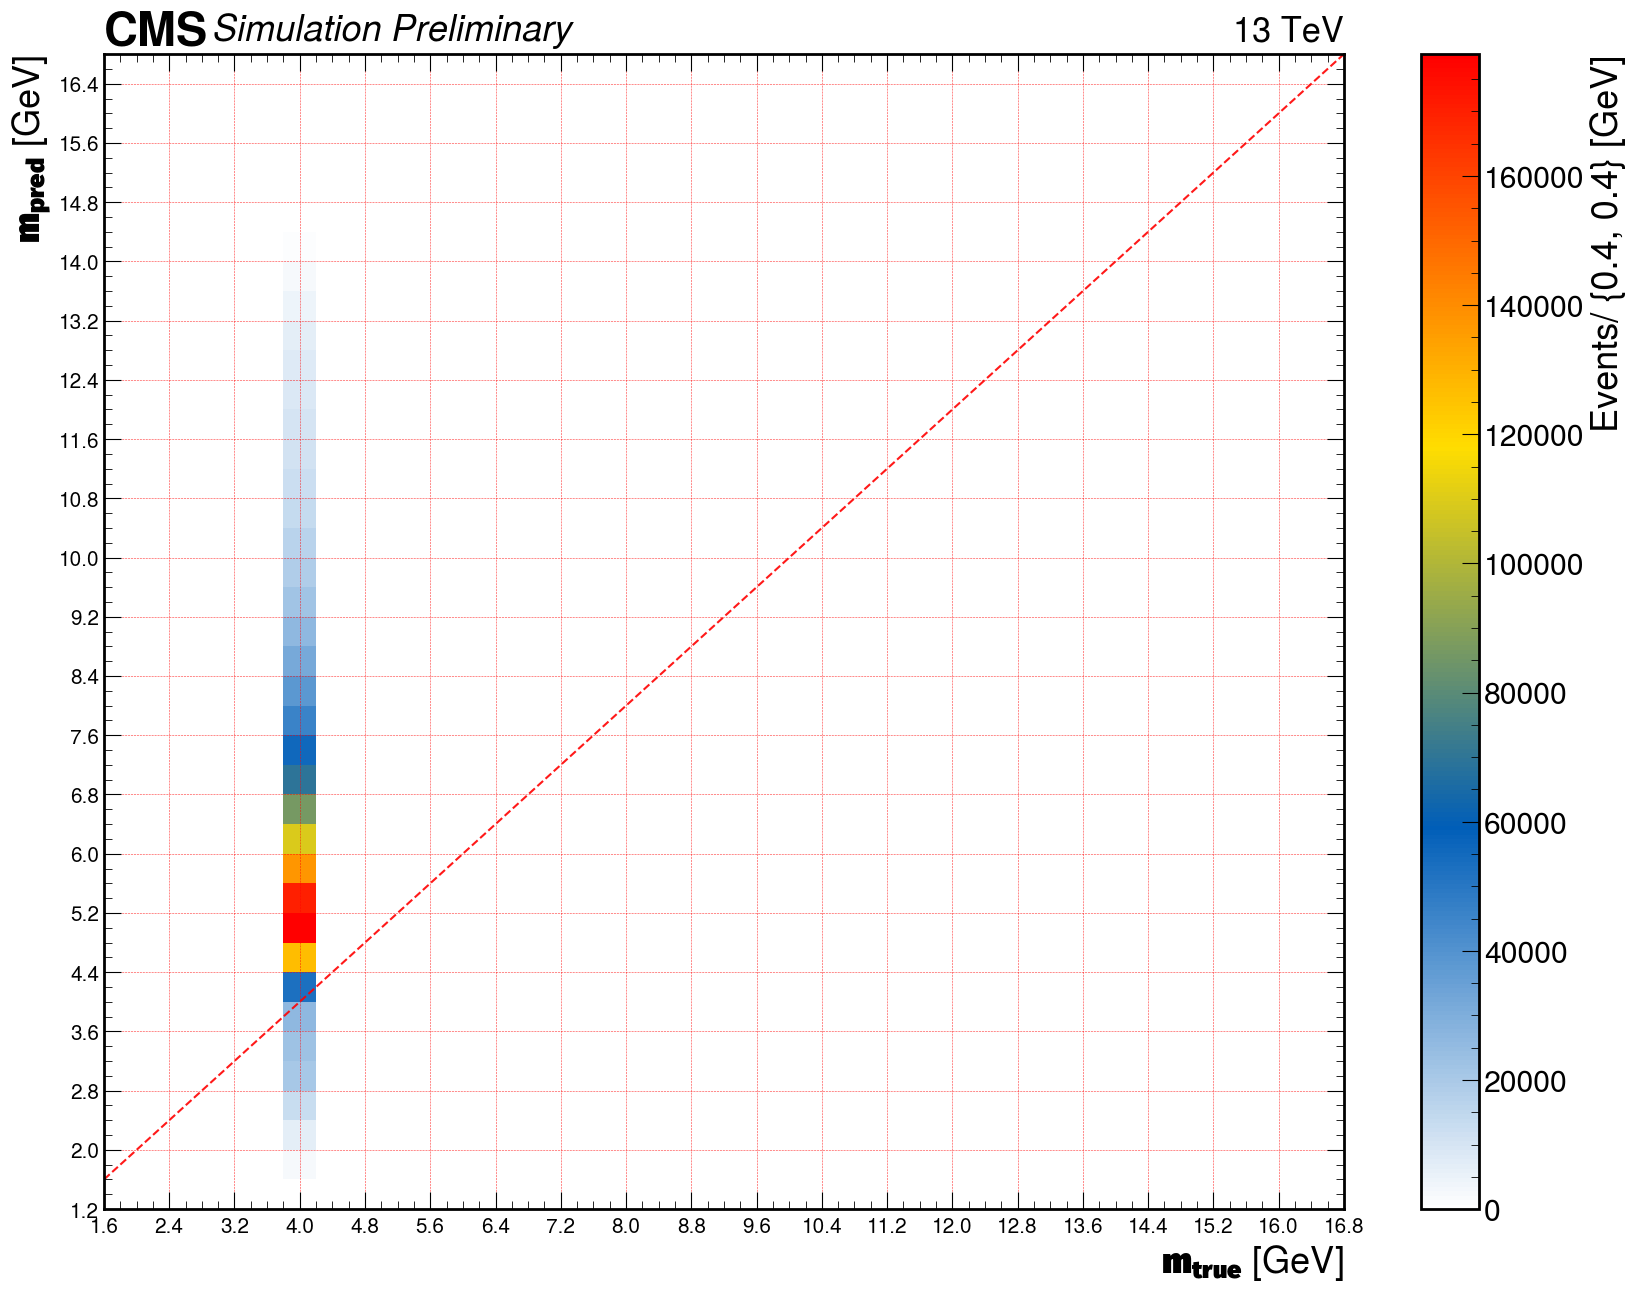

In [243]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_4), np.squeeze(m_pred_4), bins=[np.arange(m0_min-0.6, m0_max+1, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass = 5 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9787_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


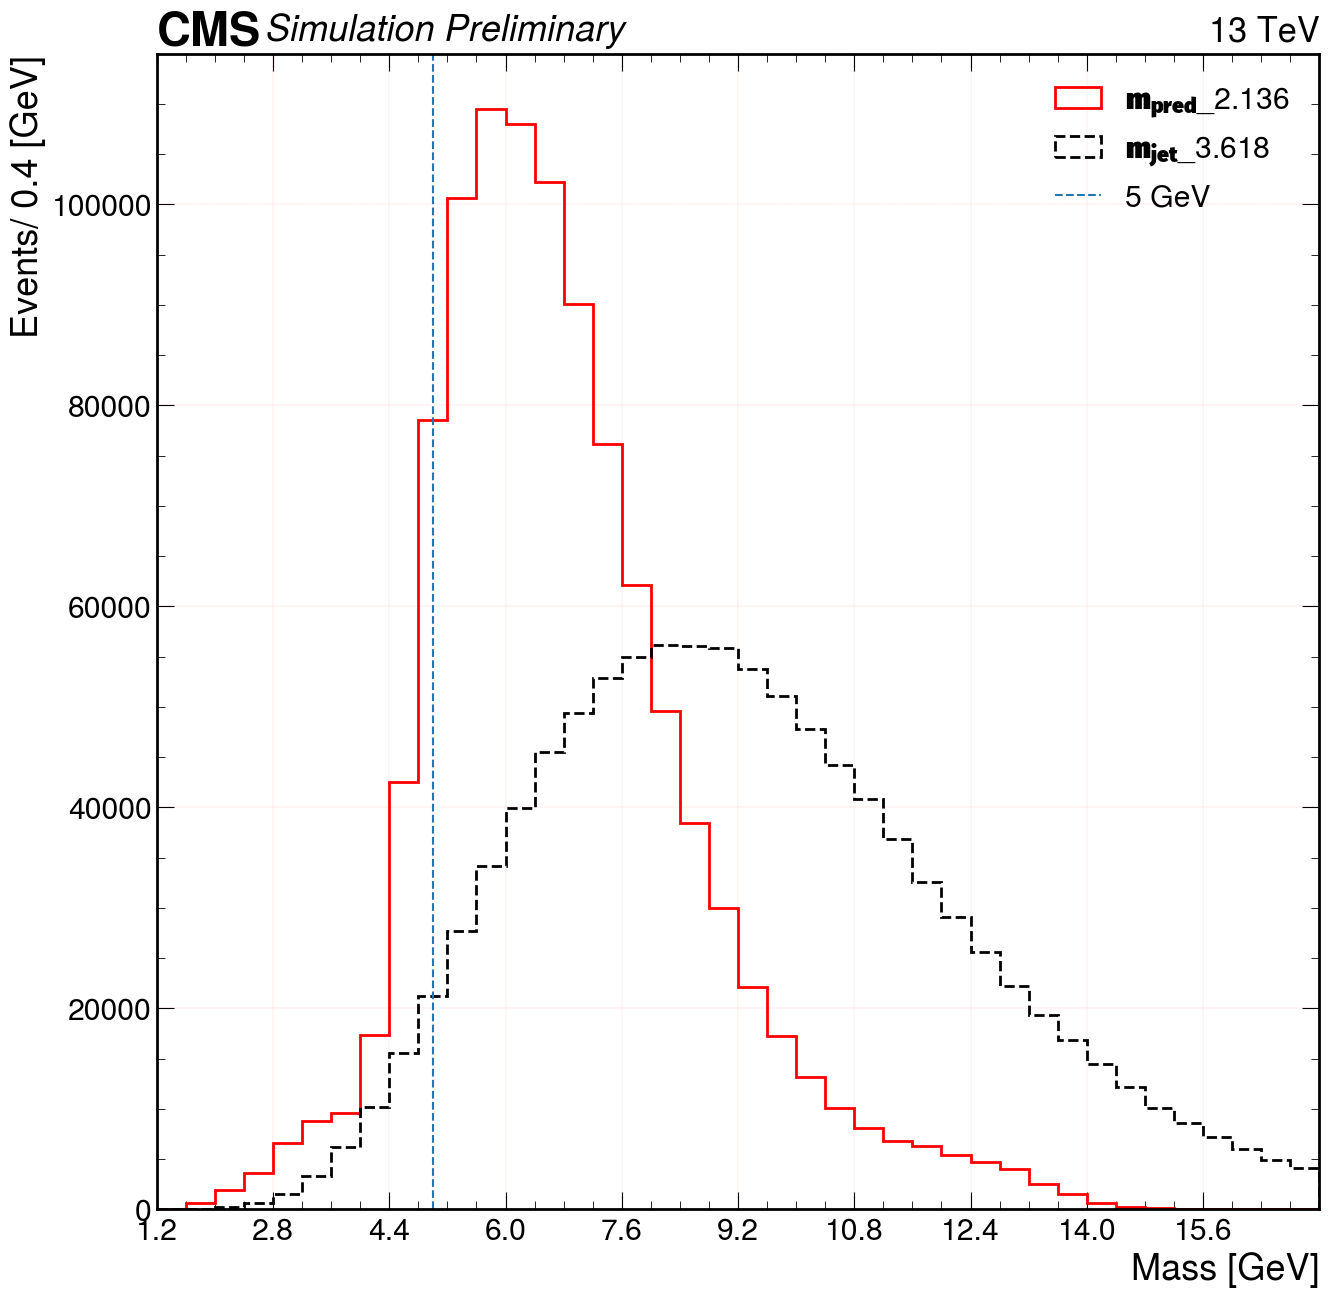

In [244]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9787_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_5 = data["m_true"]
m_pred_5 = data["m_pred"]
jet_mass5 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_5, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass5, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 5,linestyle='--',label=f'5 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

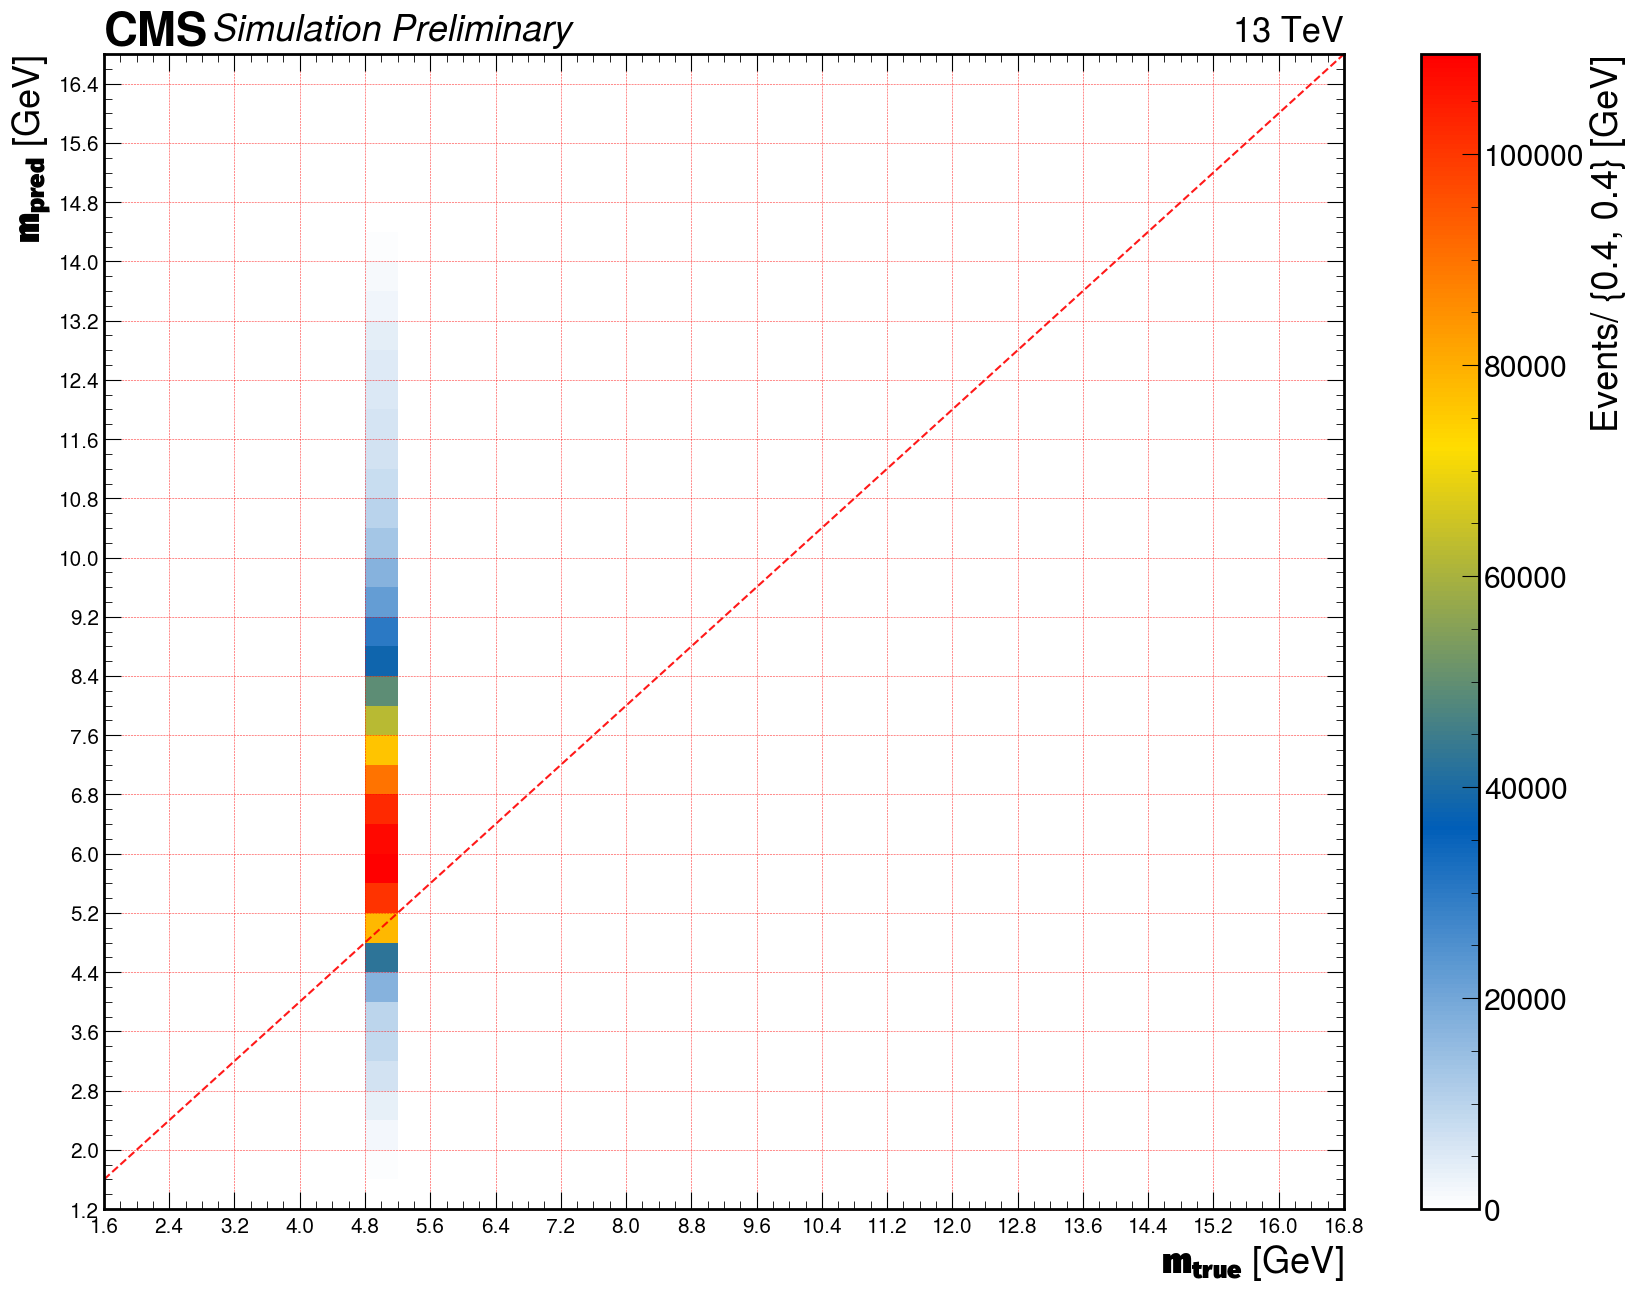

In [245]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_5), np.squeeze(m_pred_5), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal M = 6 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


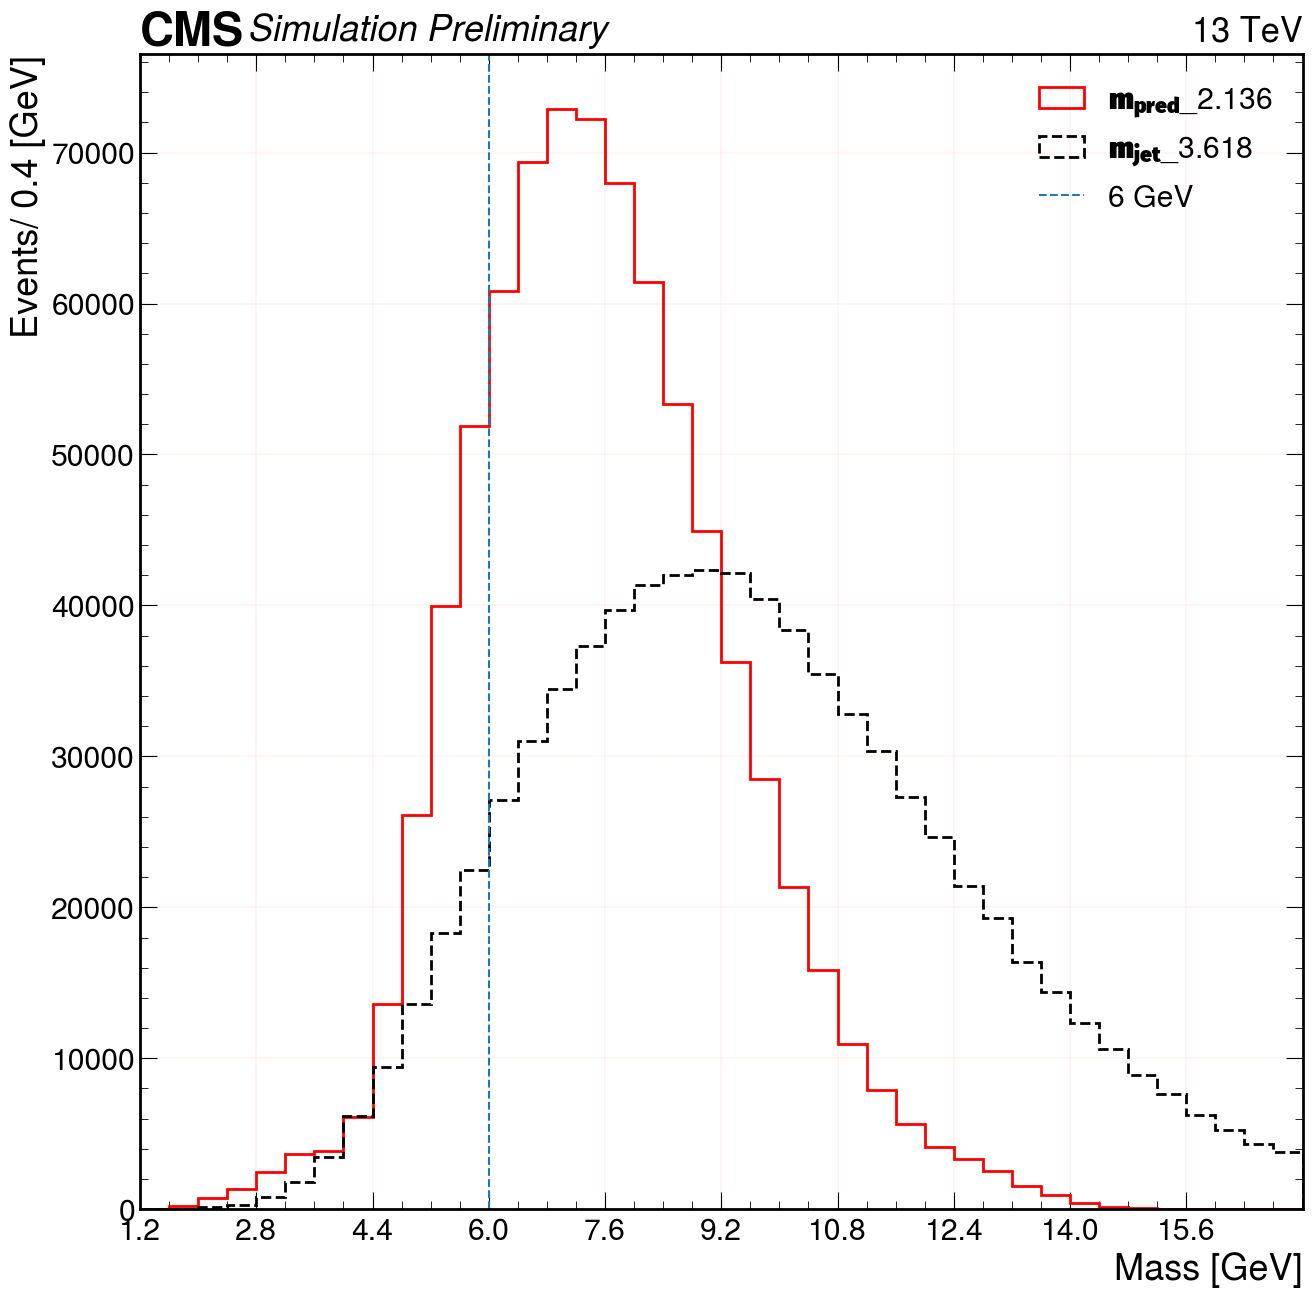

In [246]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.8849_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_6 = data["m_true"]
m_pred_6 = data["m_pred"]
jet_mass6 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_6, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass6, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 6,linestyle='--',label=f'6 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

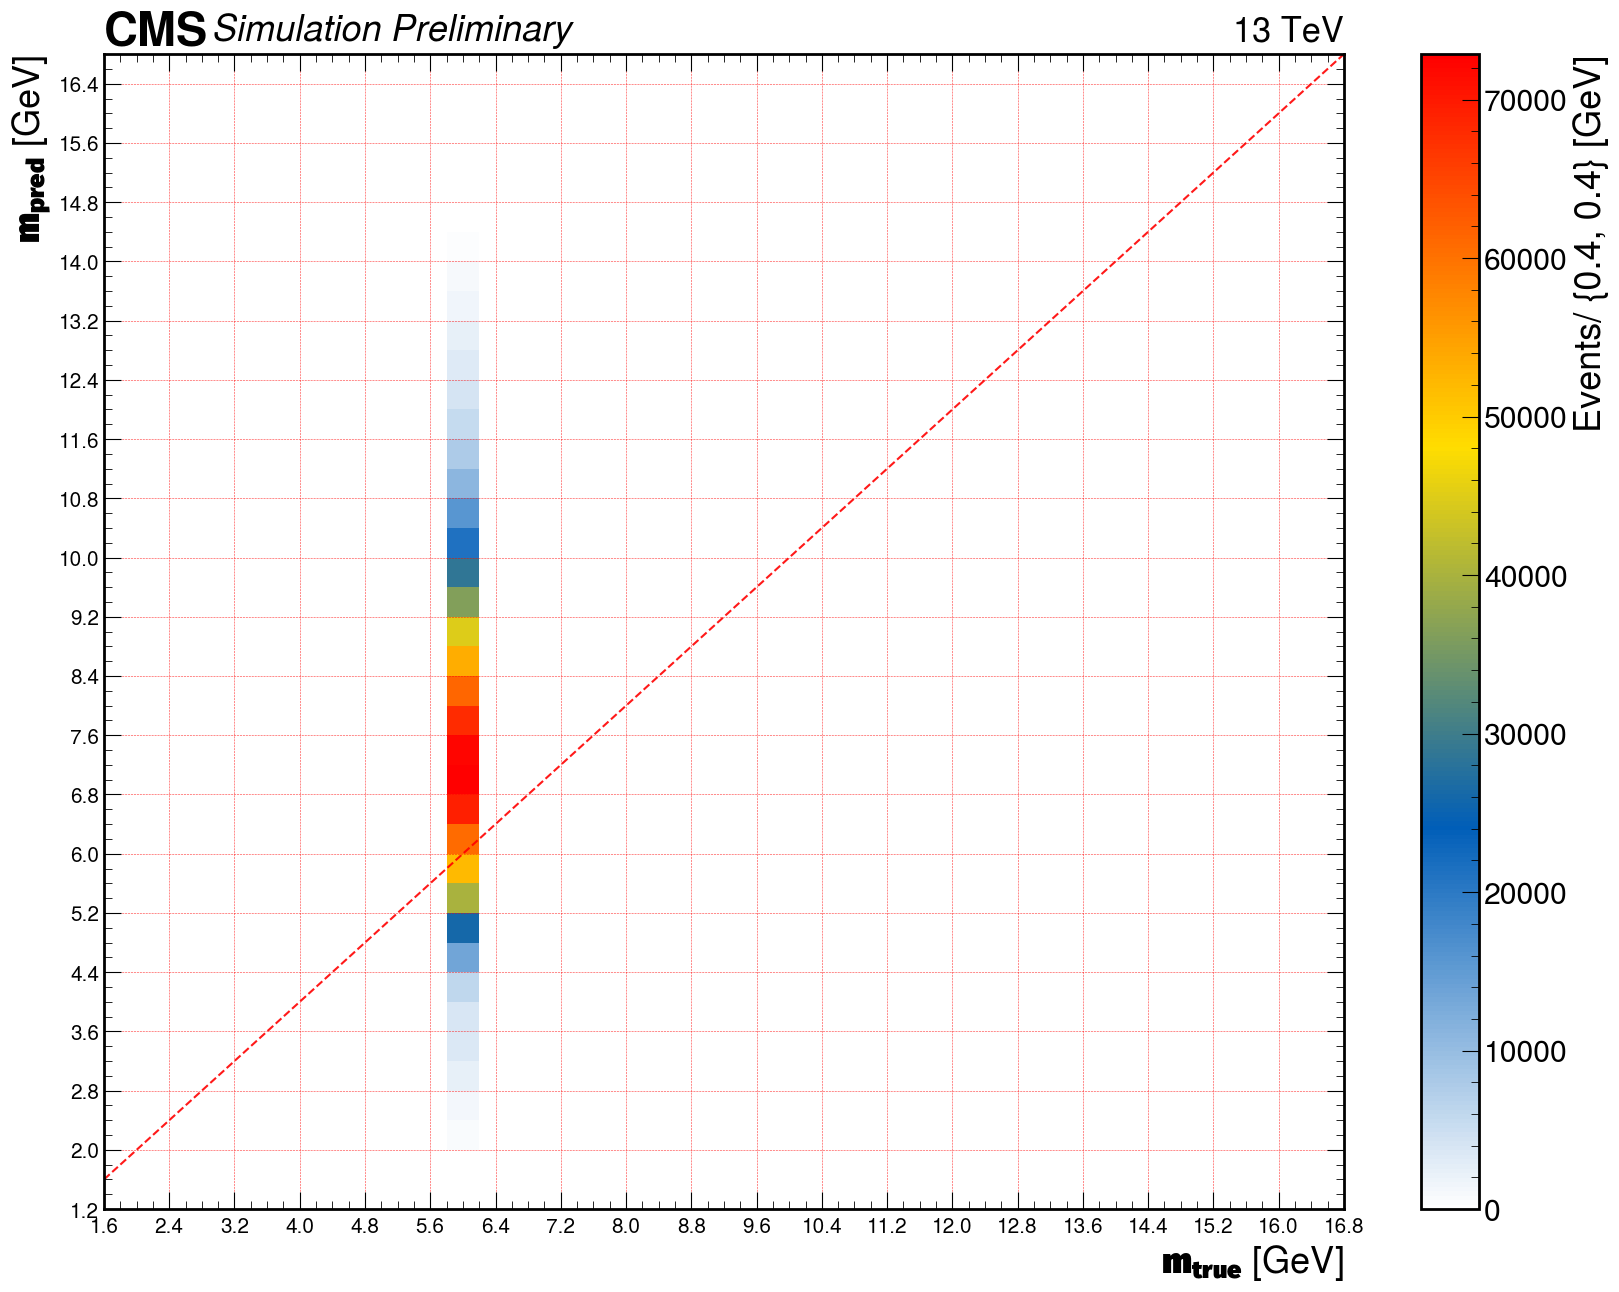

In [247]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_6), np.squeeze(m_pred_6), bins=[np.arange(m0_min-0.6, m0_max+1, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal M = 8 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9087_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


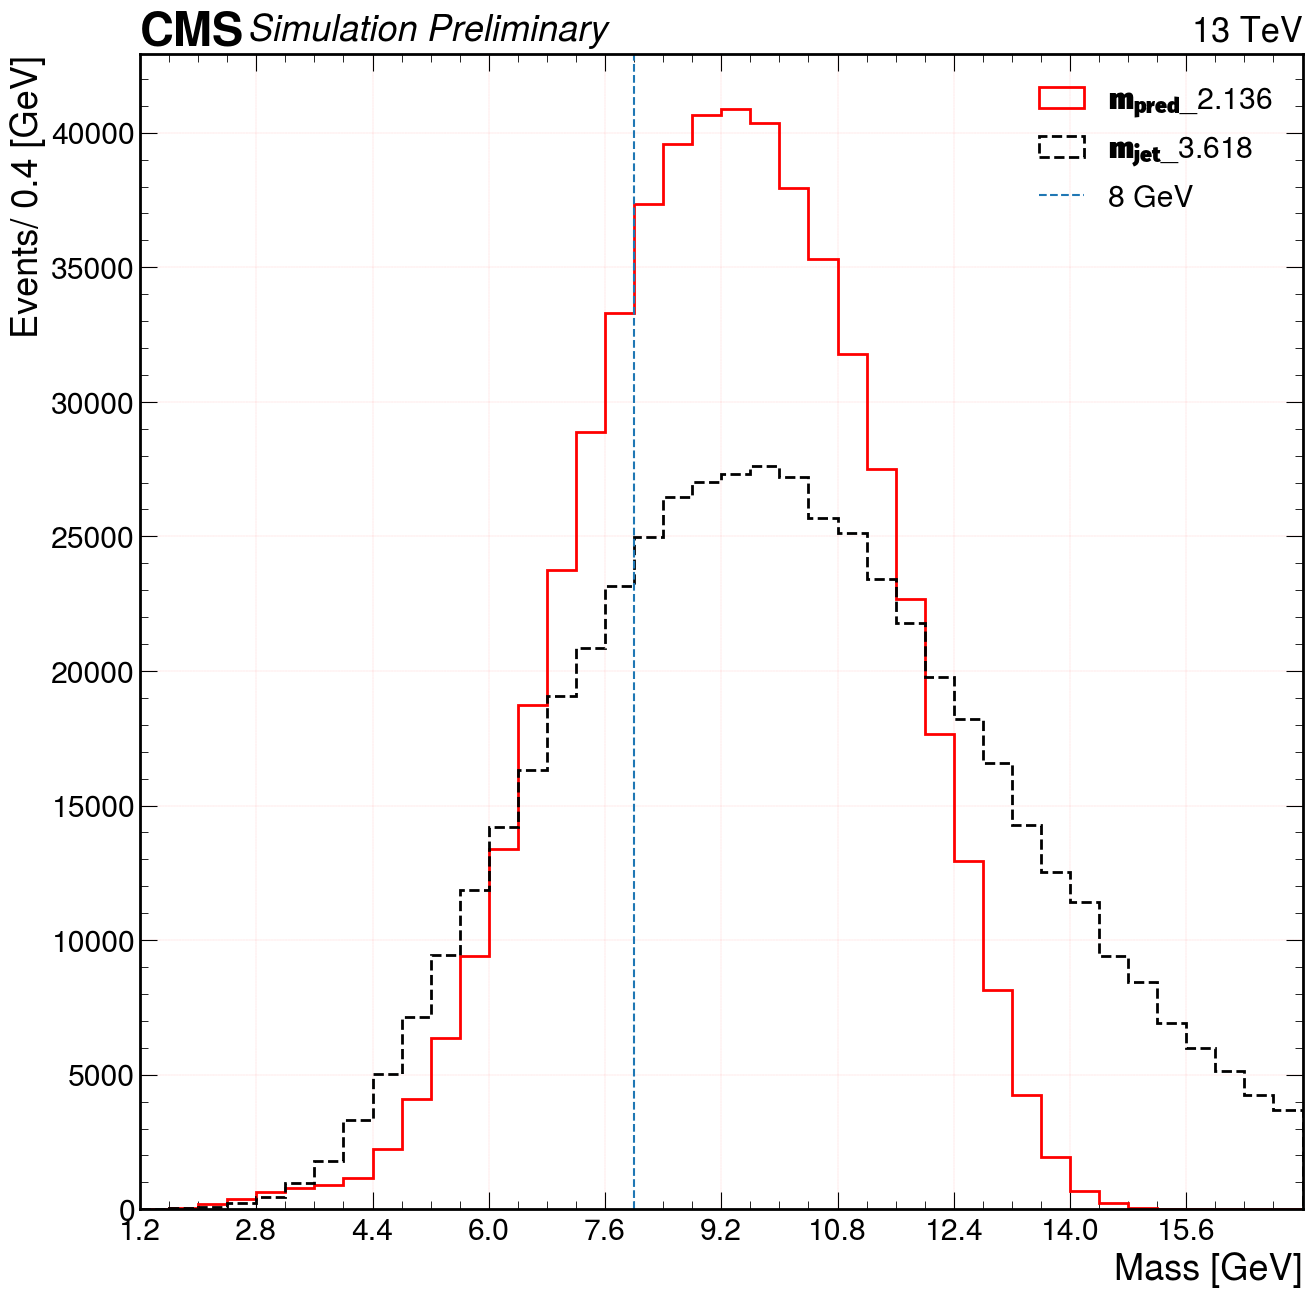

In [248]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.9087_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_8 = data["m_true"]
m_pred_8 = data["m_pred"]
jet_mass8 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_8, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass8, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 8,linestyle='--',label=f'8 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

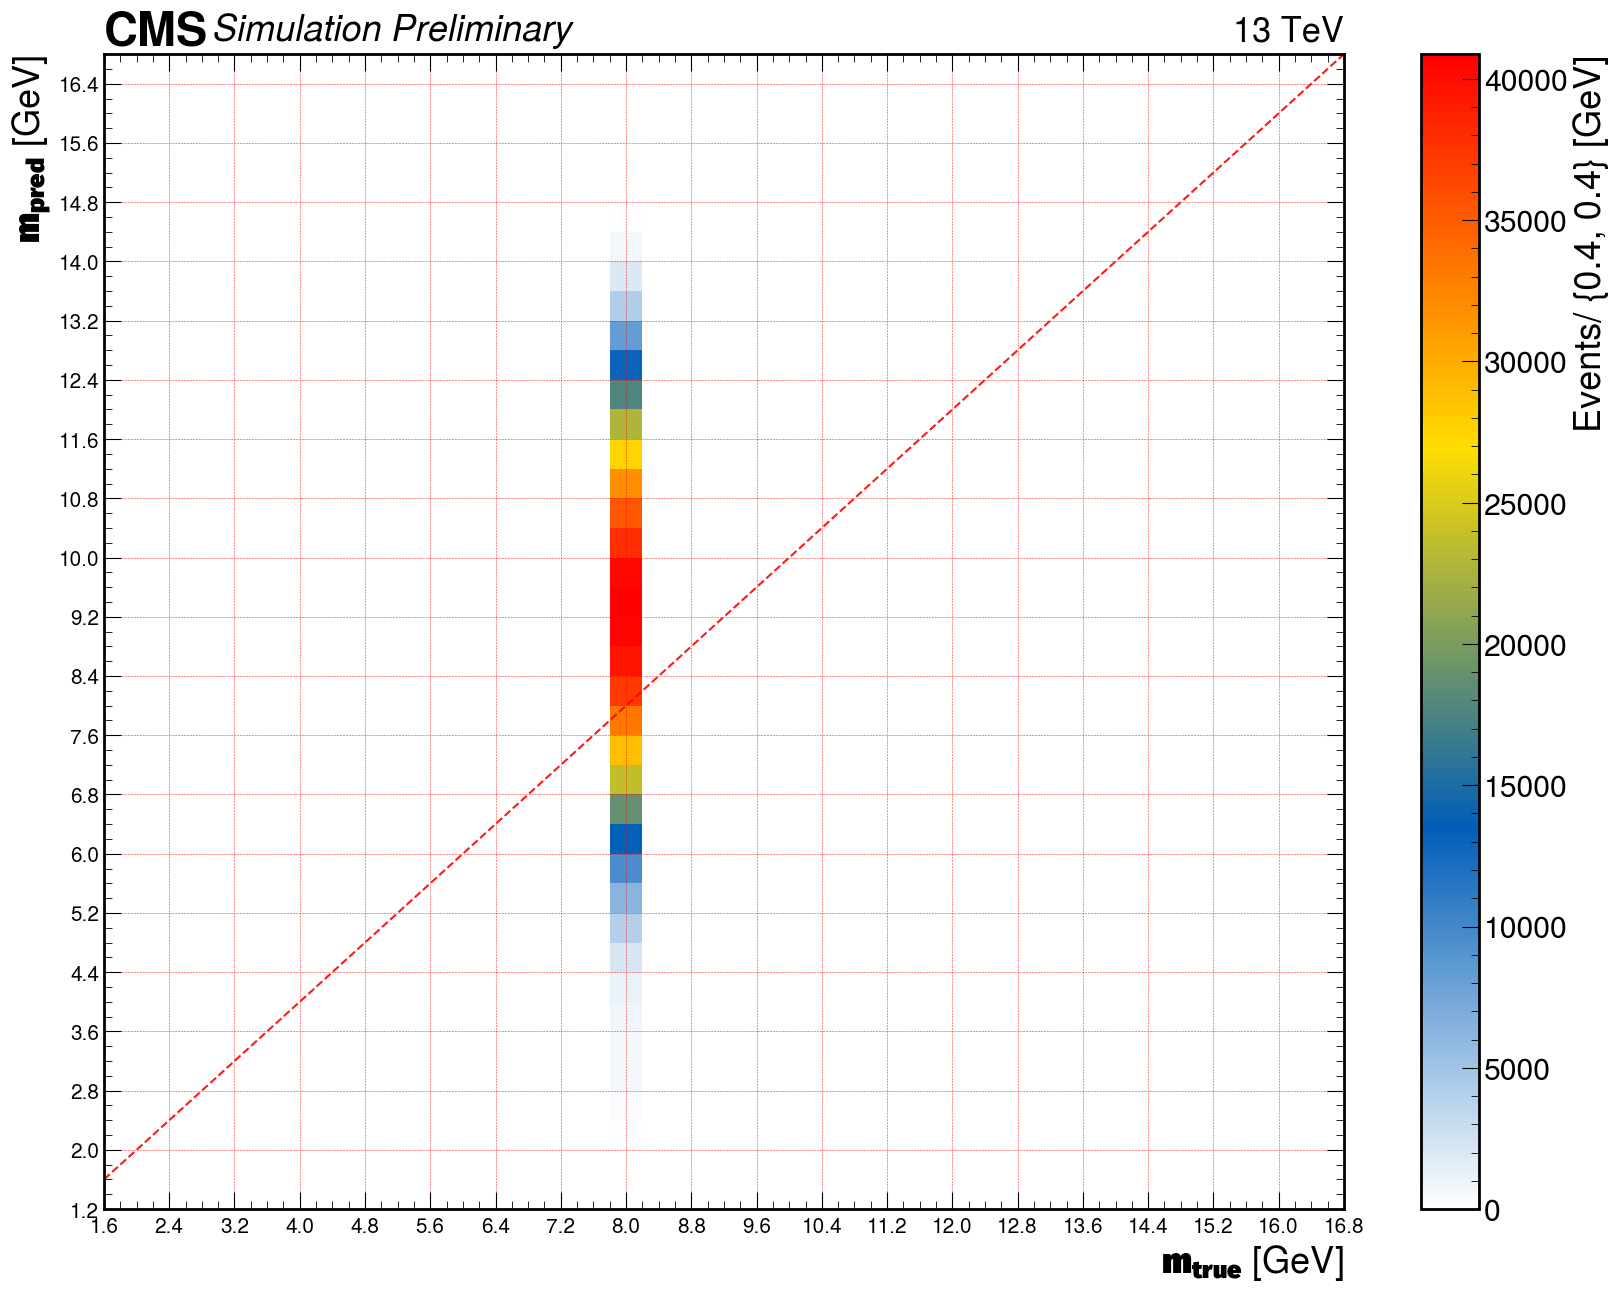

In [249]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_8), np.squeeze(m_pred_8), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass =10 Gev

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch9_val_pseudoscalar_mae2.1142_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


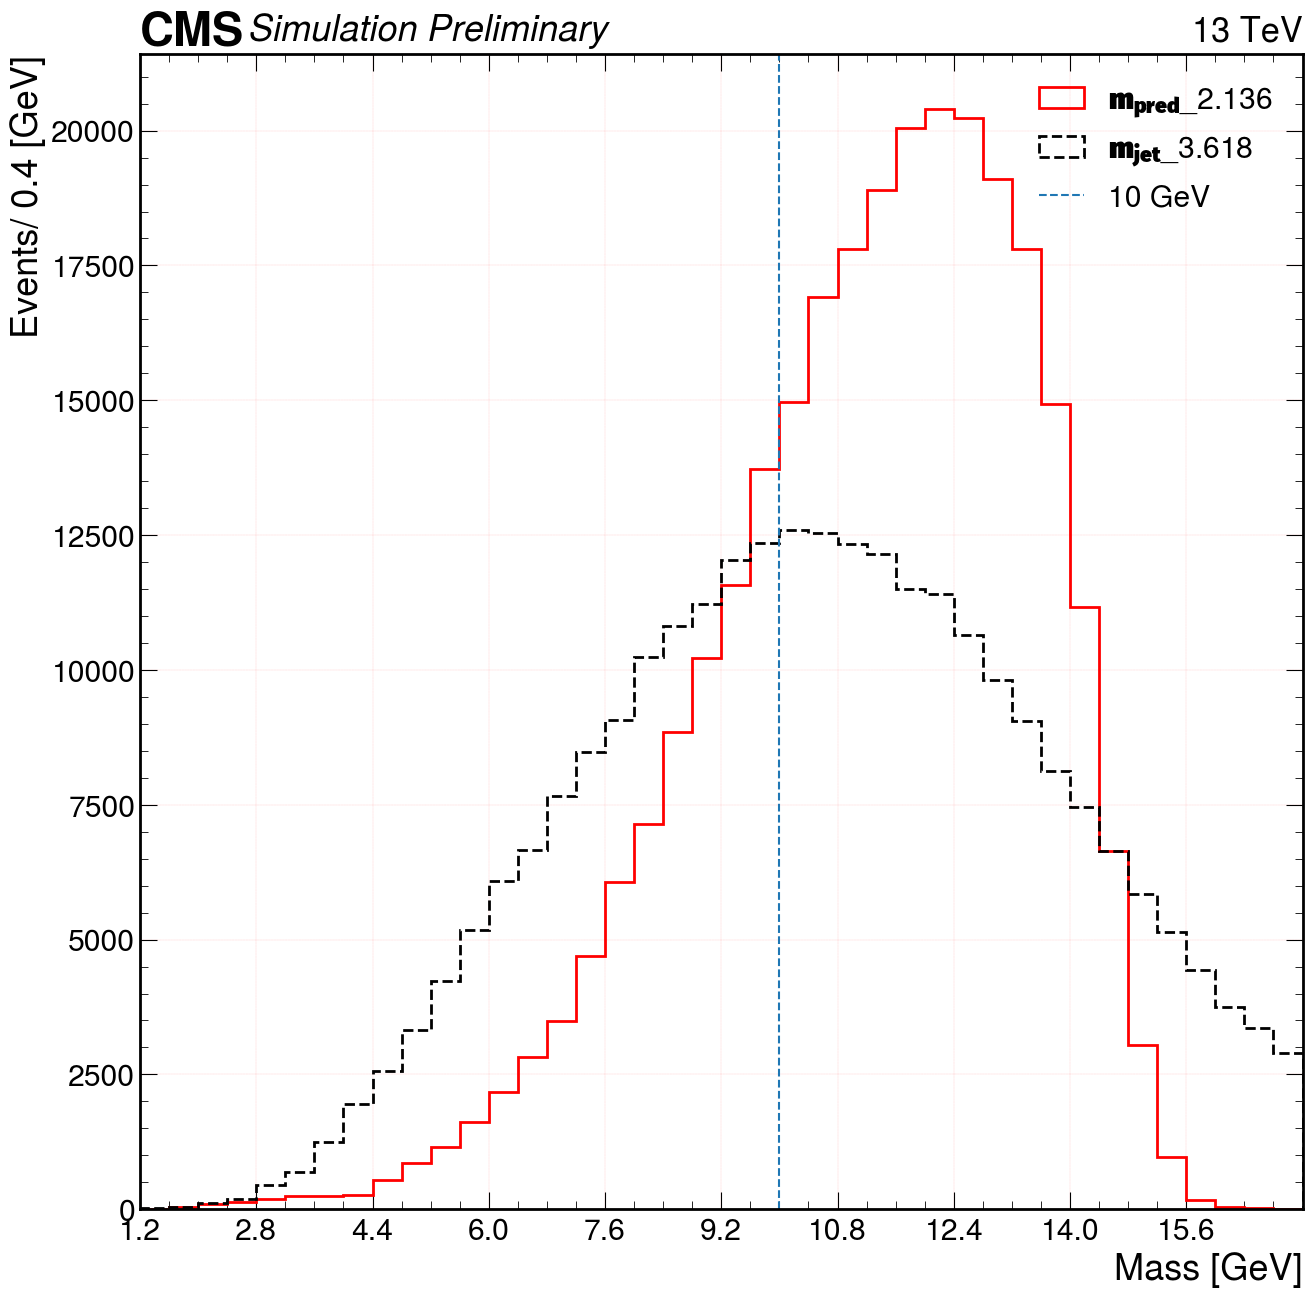

In [250]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch9_val_pseudoscalar_mae2.1142_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_10 = data["m_true"]
m_pred_10 = data["m_pred"]
jet_mass10 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_10, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass10, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 10,linestyle='--',label=f'10 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

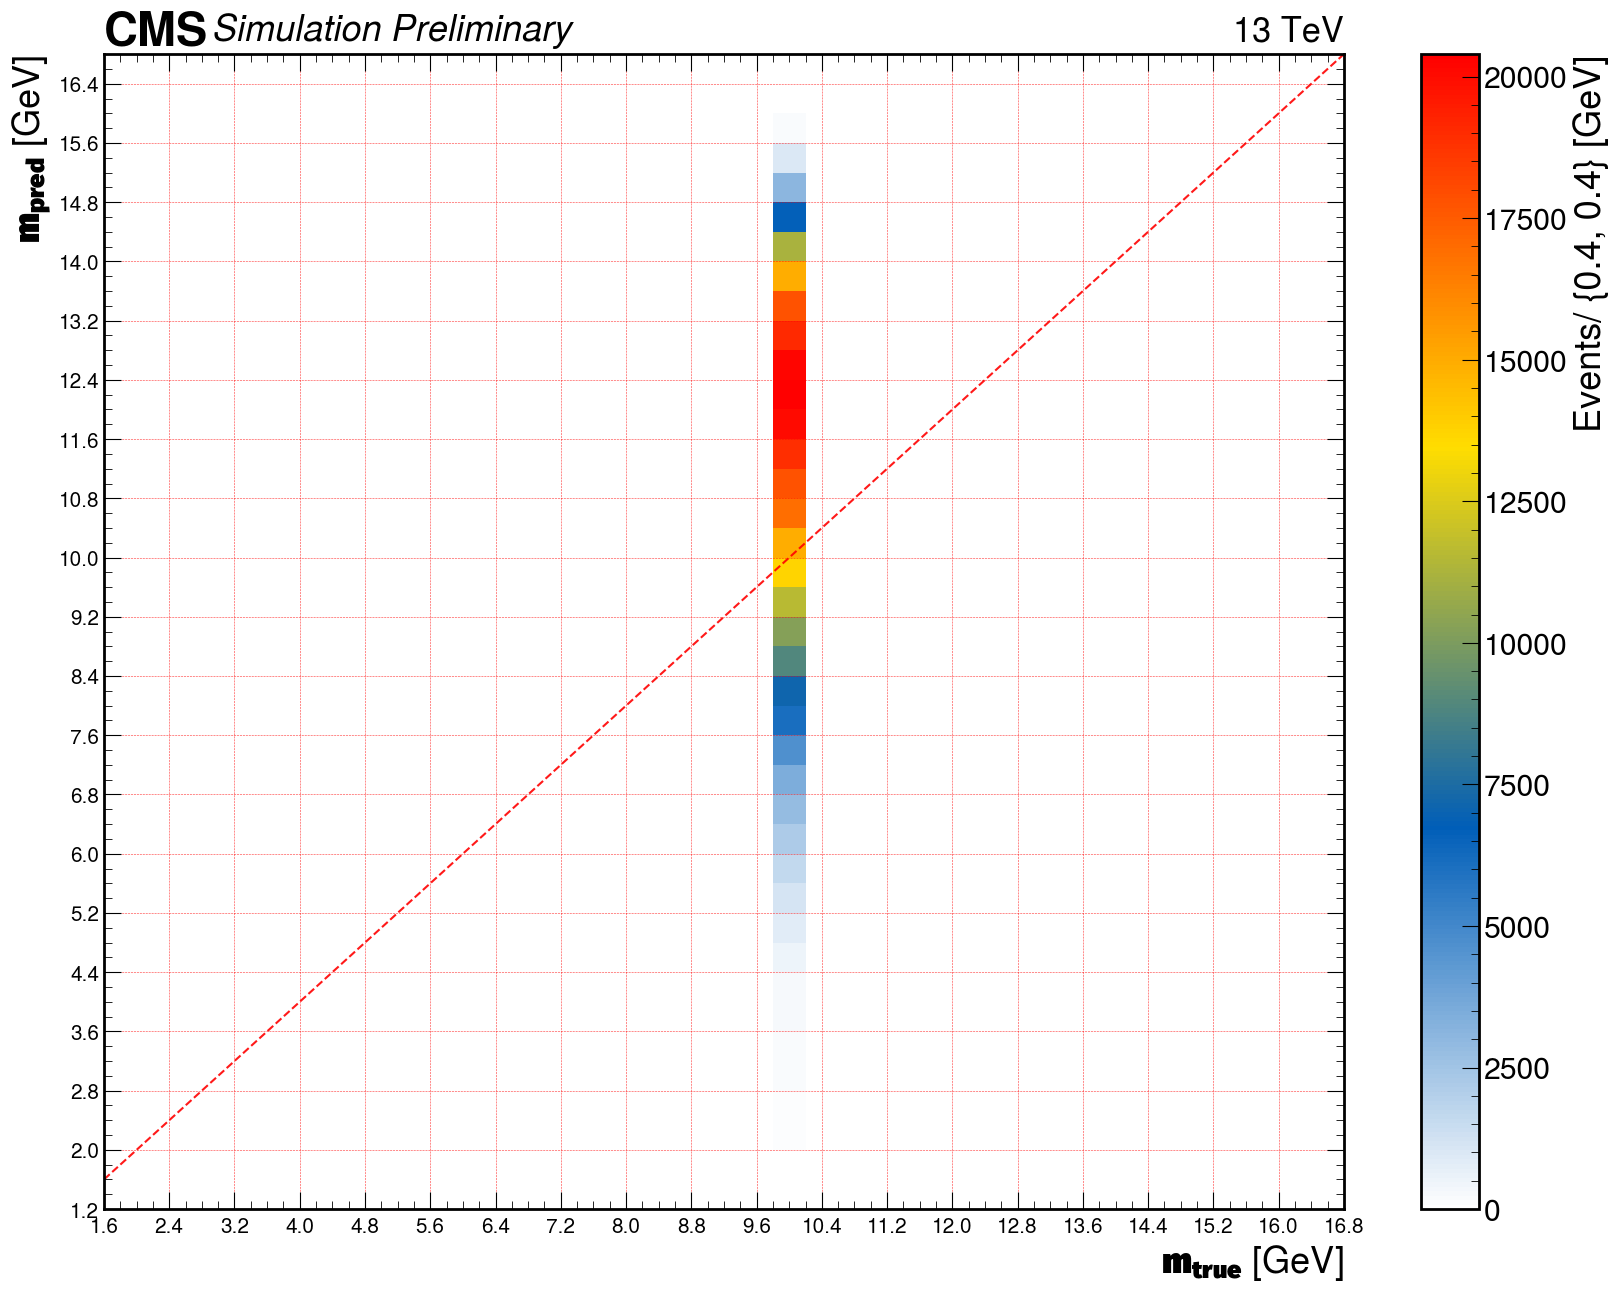

In [251]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_10), np.squeeze(m_pred_10), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass= 12 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.6734_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


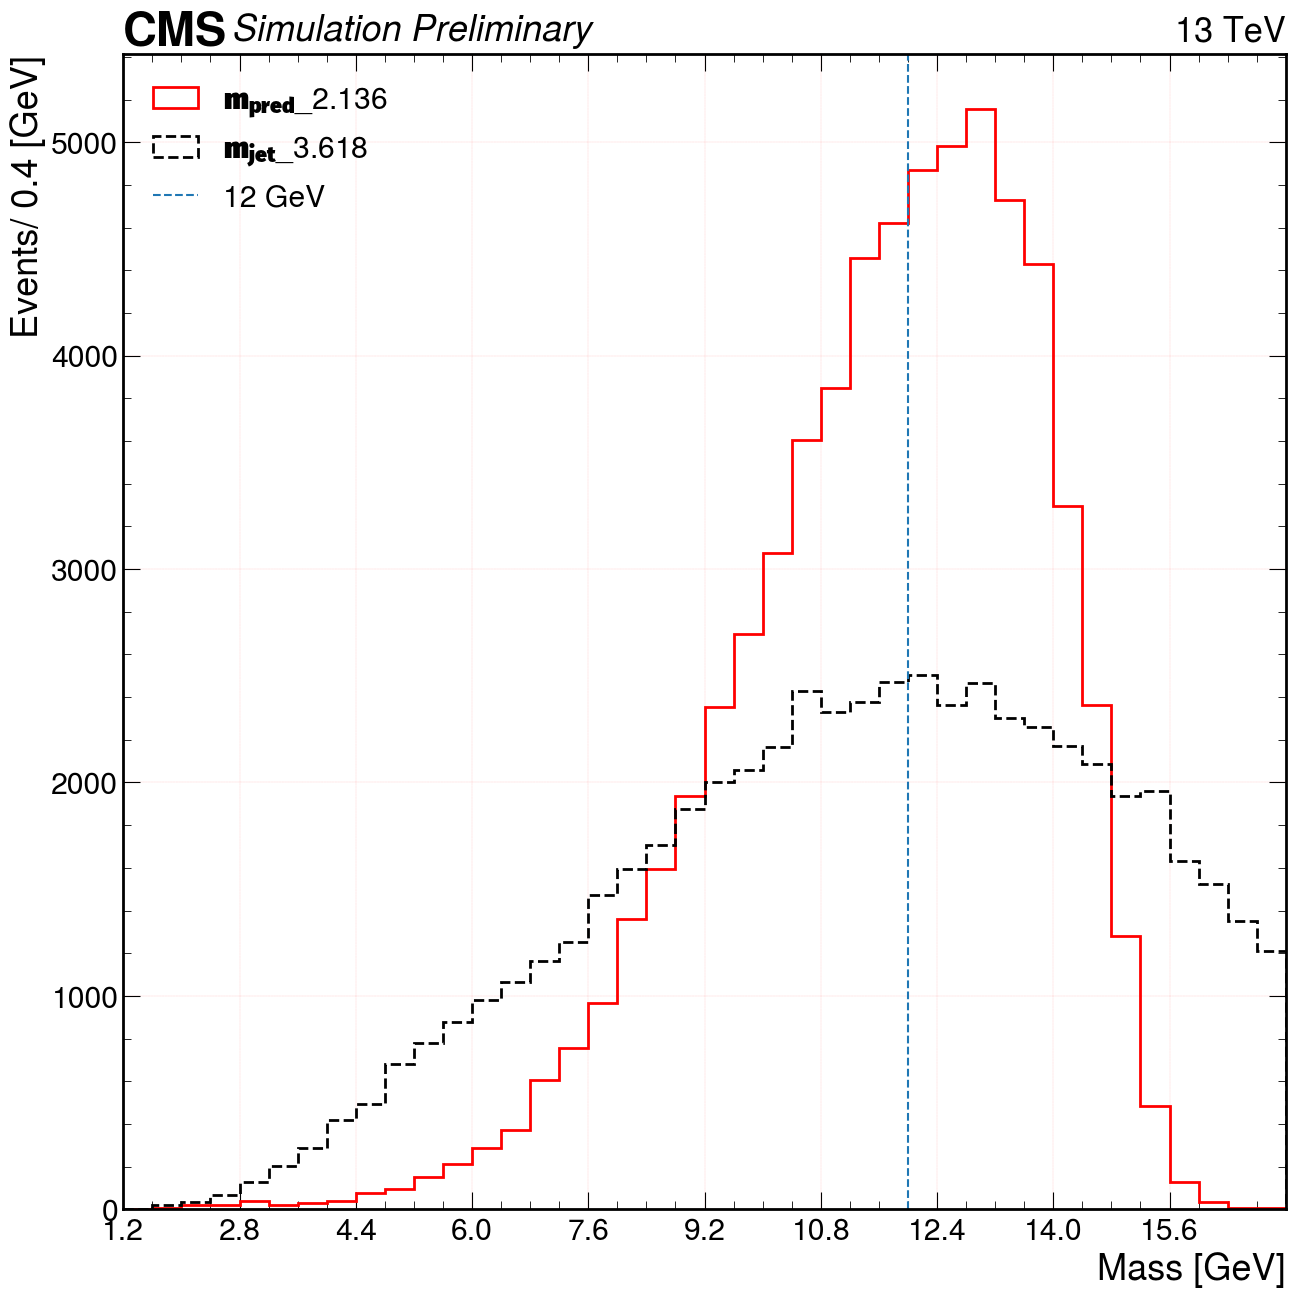

In [252]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.6734_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_12 = data["m_true"]
m_pred_12 = data["m_pred"]
jet_mass12 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_12, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass12, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 12,linestyle='--',label=f'12 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

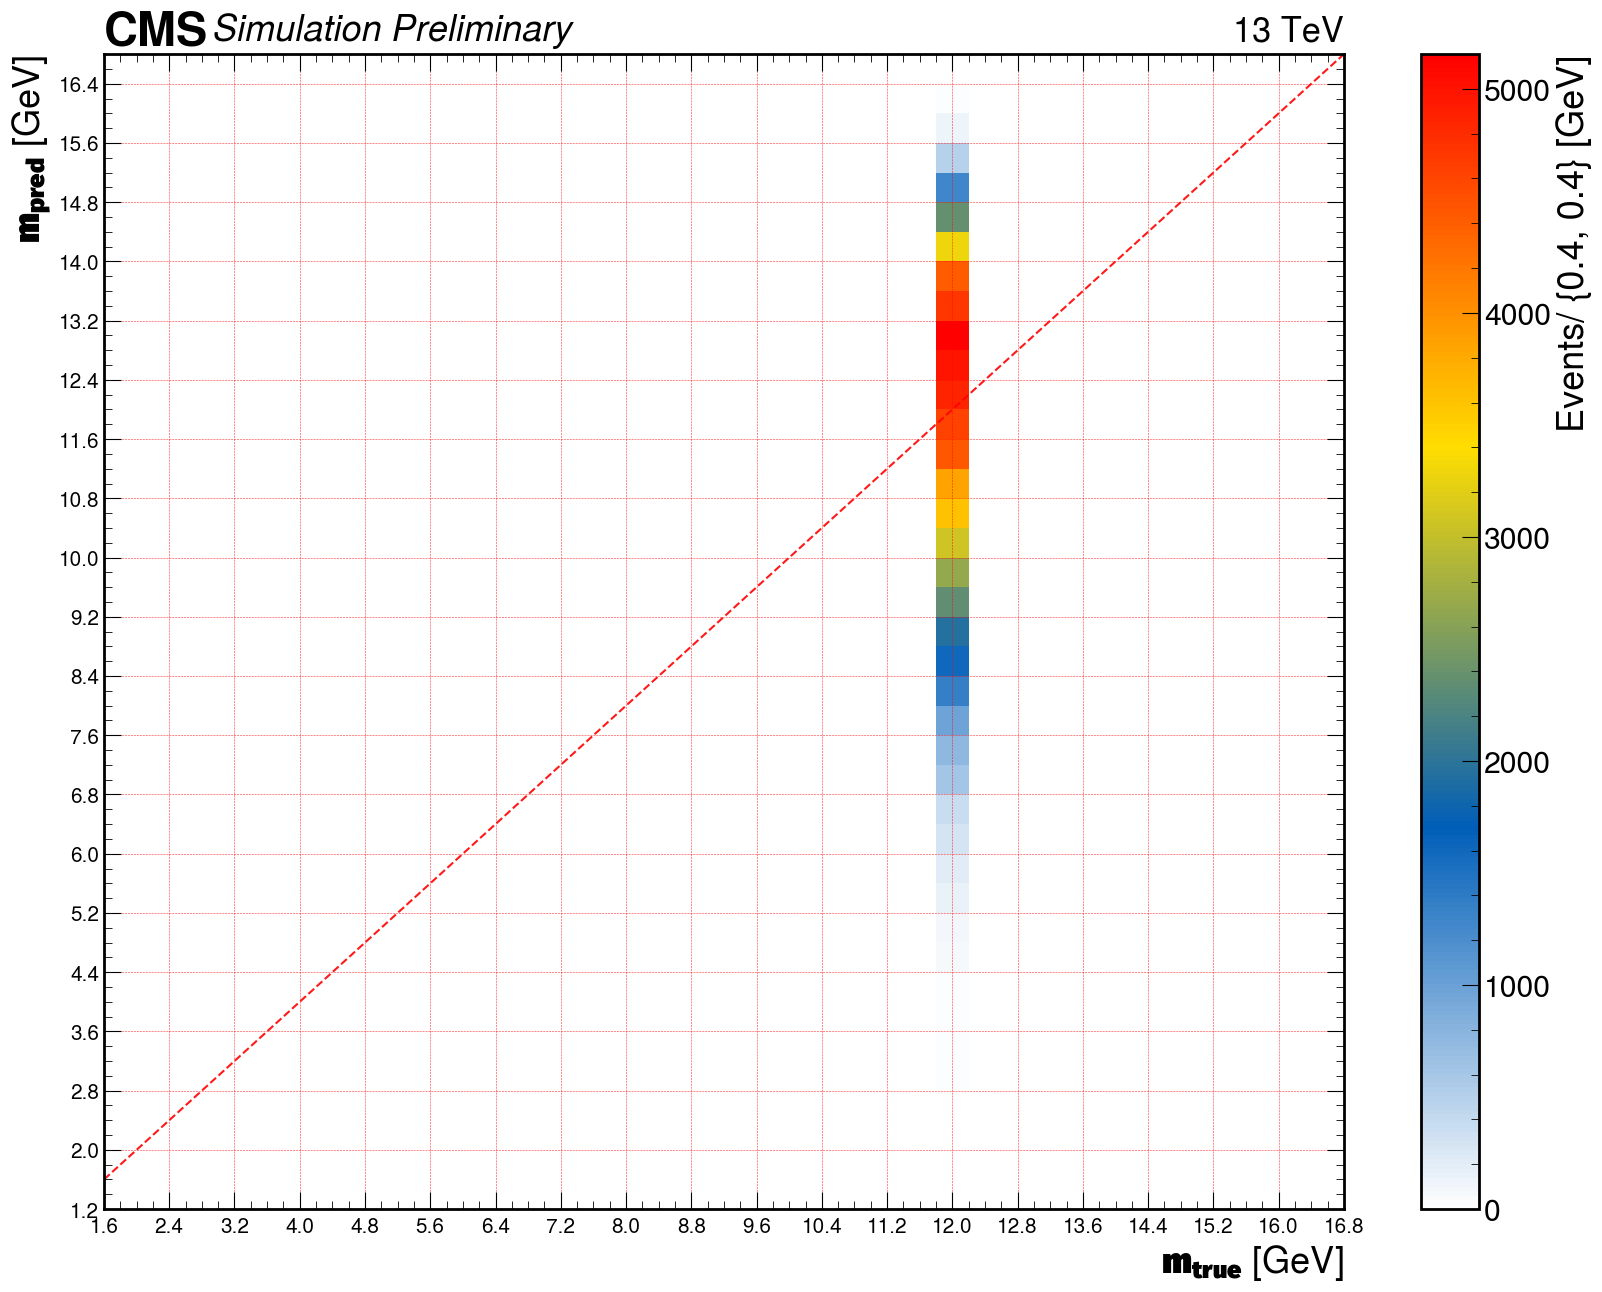

In [253]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_12), np.squeeze(m_pred_12), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Signal Mass 14 GeV

loaded data file ------>  ../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.7857_inference_data.pkl
E2E MAE   : 2.1364191988375754
PF MAE   : 3.6180532882076655


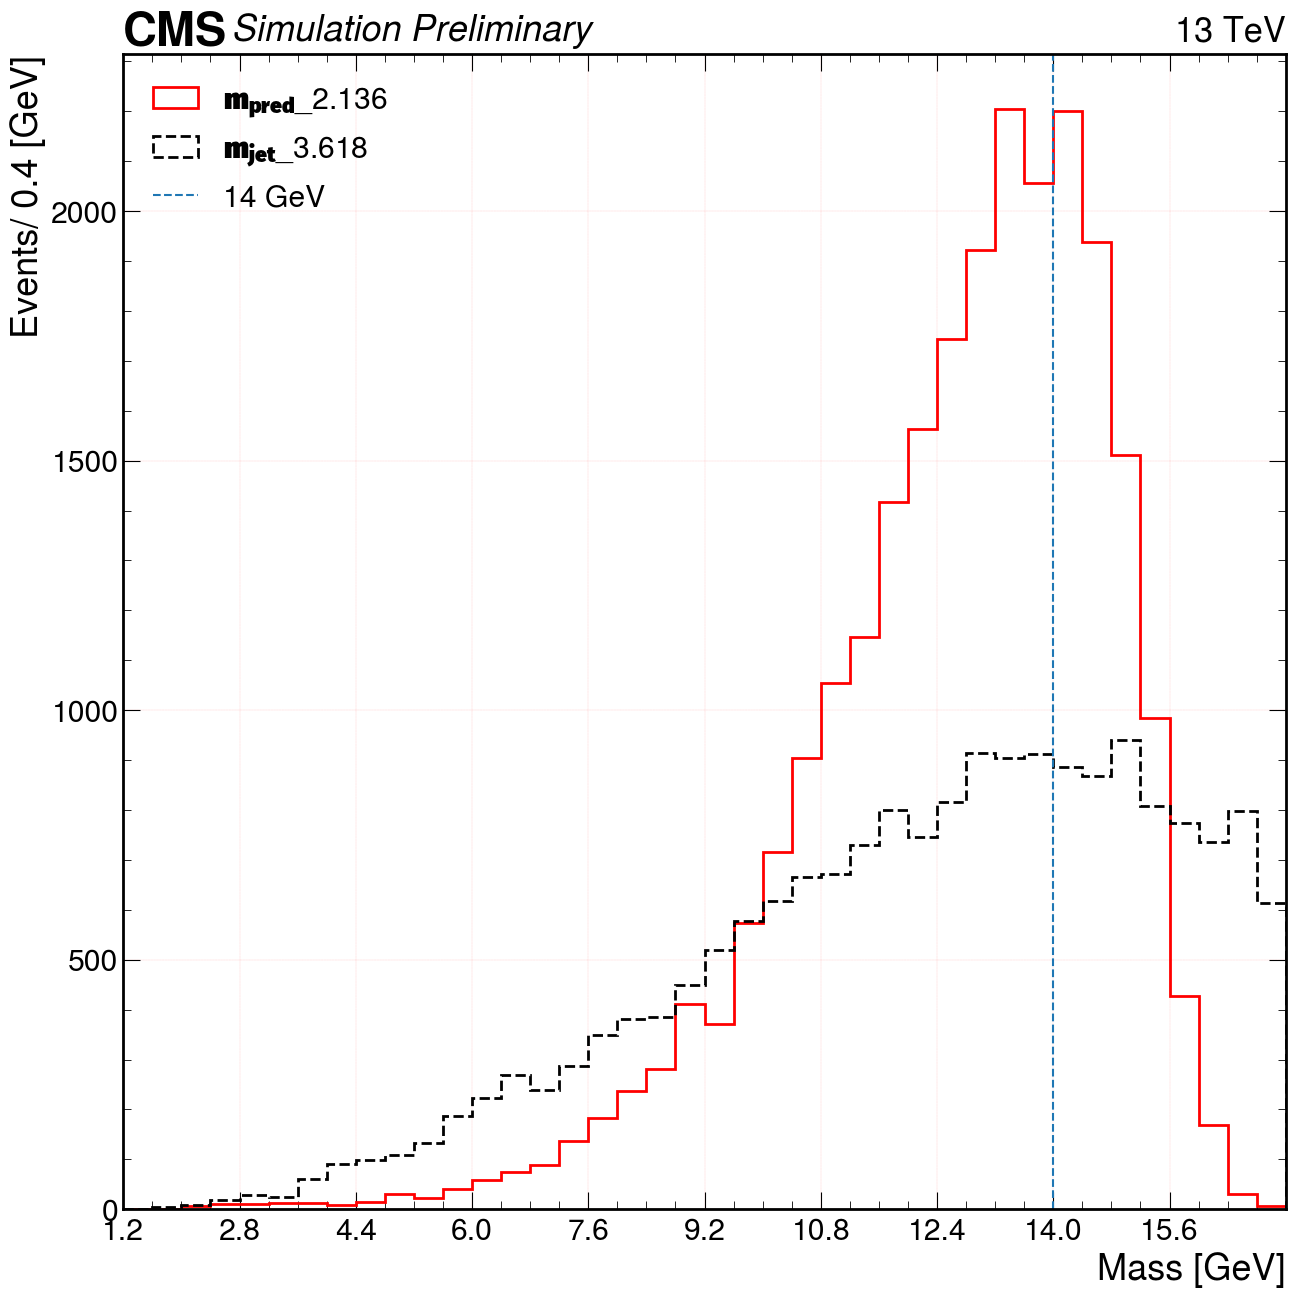

In [254]:
data_file = "../mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch10_val_pseudoscalar_mae1.7857_inference_data.pkl"
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_14 = data["m_true"]
m_pred_14 = data["m_pred"]
jet_mass14 = data["m0"]
e2e_res = np.mean(abs(m_true_ - m_pred_))
pf_res = np.mean(abs(jet_mass - m_pred_))
e2e_res = np.std(m_true_ - m_pred_)
pf_res = np.std(jet_mass - m_pred_)
print("E2E MAE   :",e2e_res)
print("PF MAE   :",pf_res)


# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
# plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,0.4)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_14, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%np.round(e2e_res,3), linestyle='-', color='red', linewidth=2)
plt.hist(jet_mass14, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%np.round(pf_res,3), linestyle='--', color='black', linewidth=2)
plt.axvline(x= 14,linestyle='--',label=f'14 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

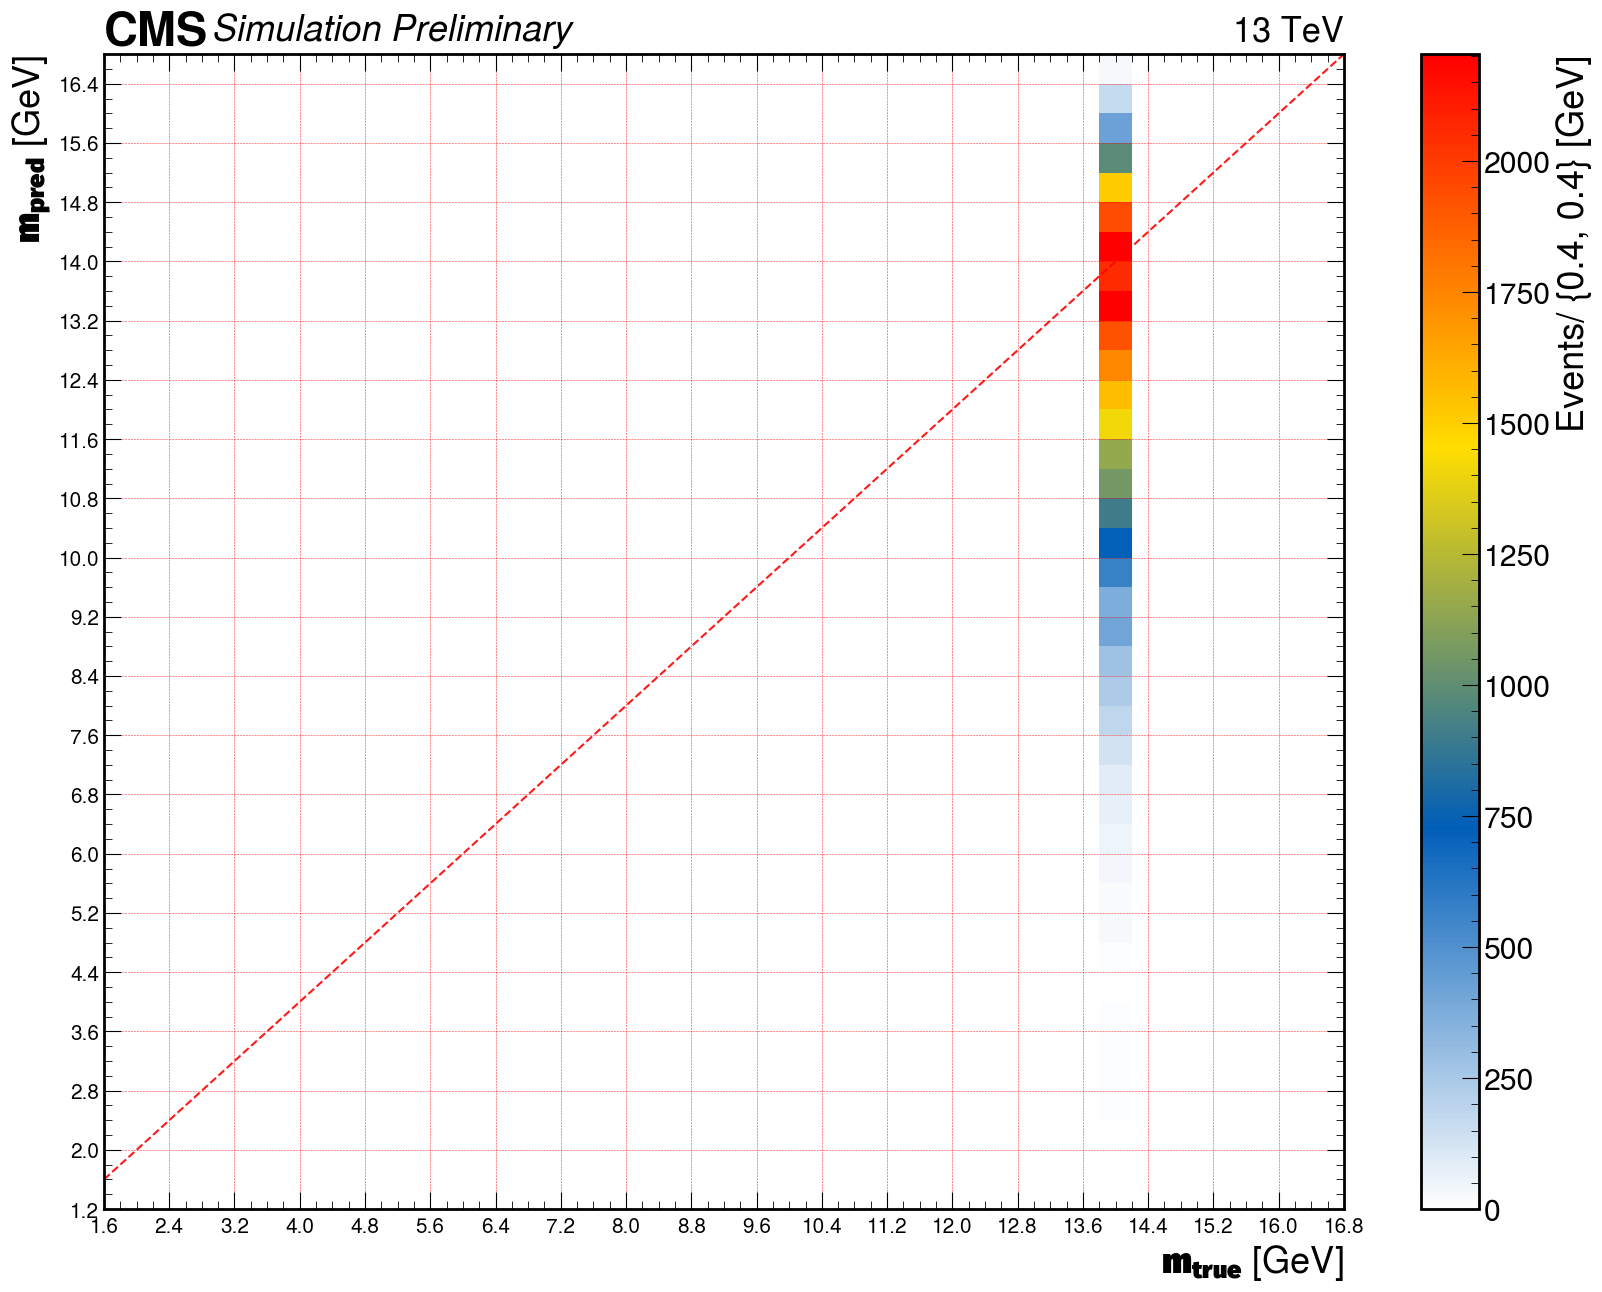

In [255]:
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_14), np.squeeze(m_pred_14), bins=[np.arange(m0_min-0.6, m0_max+1., .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()